Project

In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [72]:
df = pd.read_csv("heloc_dataset_v1.csv")

In [73]:
n_rows = df.shape[0]  
n_cols = df.shape[1] 
col_names = df.columns.tolist() 
row_indexes = df.index.tolist() 
df_first3rows = df.head(3)
df_last3rows = df.tail(3)
df_rows1and3 = df.iloc[[1, 3], :]
df_cols2and4 = df.iloc[:, [2, 4]] 
series_customer5 = df.iloc[5] 
df_first3rowsAndCols = df.iloc[:3, :3]

In [74]:
# Print extracted information
print("Number of rows:", n_rows)
print("Number of columns:", n_cols)
print("Column names:", col_names)
print("First 3 rows:\n", df_first3rows)
print("Columns 2 and 4:\n", df_cols2and4)
print("Series for customer 5:\n", series_customer5)
print("First 3 rows and columns:\n", df_first3rowsAndCols)

Number of rows: 10459
Number of columns: 24
Column names: ['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
First 3 rows:
   RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   

   MSinceMostRecentTradeOpen  AverageMInFile  

In [75]:
df_first3rowsAndCols.isnull()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen
0,False,False,False
1,False,False,False
2,False,False,False


In [76]:
df_first3rowsAndCols.isnull().any(axis=0)

RiskPerformance          False
ExternalRiskEstimate     False
MSinceOldestTradeOpen    False
dtype: bool

In [77]:
df_first3rowsAndCols.isnull().any(axis=1)

0    False
1    False
2    False
dtype: bool

In [78]:
n_cols_with_missing_values = df.isnull().any(axis=0).sum()
n_rows_with_missing_ExternalRiskEstimate_values = df['ExternalRiskEstimate'].isnull().sum()

print(n_cols_with_missing_values)
print(n_rows_with_missing_ExternalRiskEstimate_values)

0
0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [80]:
cols_numeric = [col for col in col_names if df[col].dtype in ['int64', 'float64']]

cols_string = [col for col in col_names if df[col].dtype == 'object']

print(cols_numeric)
print(cols_string)

['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
['RiskPerformance']


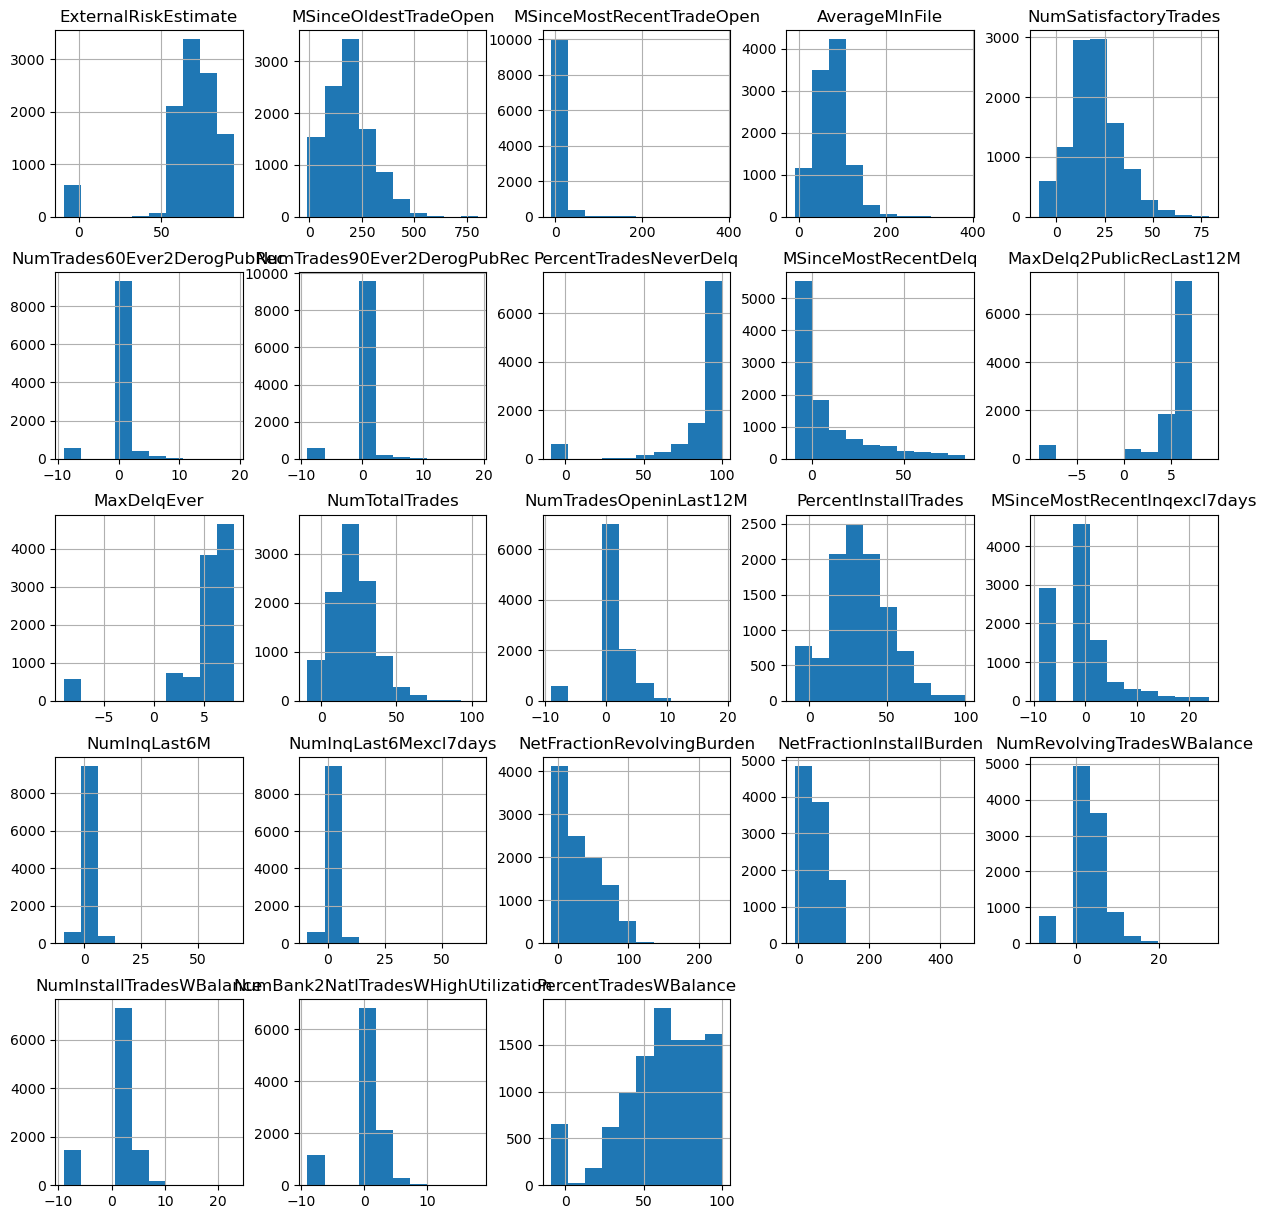

In [81]:
df.hist(figsize=(15,15));

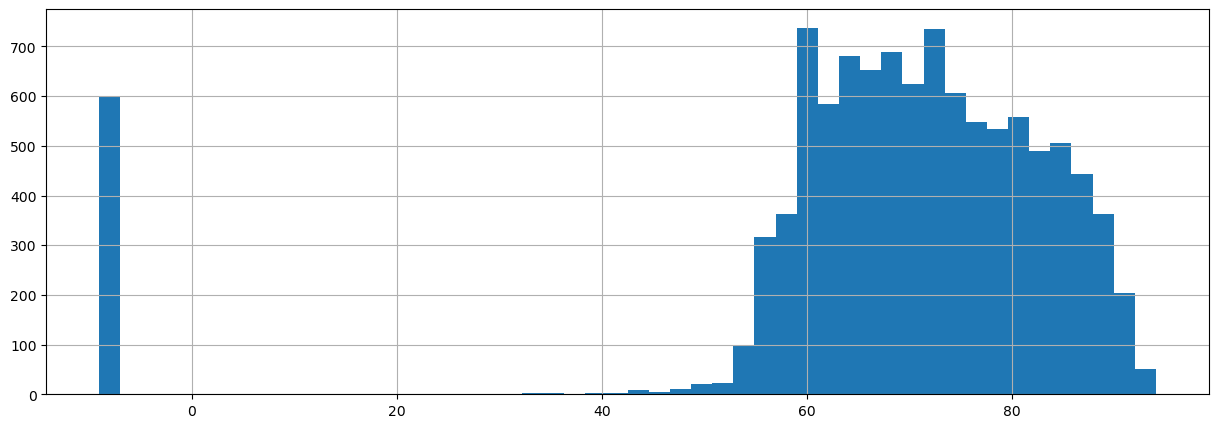

In [82]:
df['ExternalRiskEstimate'].hist(figsize=(15,5), bins=50);

In [83]:
df_missing_ExternalRiskEstimate = df[df['ExternalRiskEstimate'] == -9]
n_rows_with_missing_ExternalRiskEstimate = df_missing_ExternalRiskEstimate.shape[0]
n_rows_all_numeric_missing = df[(df[cols_numeric] == -9).all(axis=1)].shape[0]
df_without_missing_rows = df[df[cols_numeric].eq(-9).all(axis=1) == False]

print("Rows with missing ExternalRiskEstimate:\n", df_missing_ExternalRiskEstimate)
print("Number of rows with missing ExternalRiskEstimate:", n_rows_with_missing_ExternalRiskEstimate)
print("Number of rows where all numeric columns have missing values:", n_rows_all_numeric_missing)
print("DataFrame without fully missing numeric rows:\n", df_without_missing_rows)

In [84]:
s_minus_7 = (df_without_missing_rows == -7).sum()

In [85]:
s_minus_8 = (df_without_missing_rows == -8).sum()
s_minus_9 = (df_without_missing_rows == -9).sum()

df_count_missing = pd.concat([s_minus_7, s_minus_8, s_minus_9], axis=1)
df_count_missing.columns = [-7, -8, -9]

print(df_count_missing)

                                      -7    -8  -9
RiskPerformance                        0     0   0
ExternalRiskEstimate                   0     0  10
MSinceOldestTradeOpen                  0   239   0
MSinceMostRecentTradeOpen              0     0   0
AverageMInFile                         0     0   0
NumSatisfactoryTrades                  0     0   0
NumTrades60Ever2DerogPubRec            0     0   0
NumTrades90Ever2DerogPubRec            0     0   0
PercentTradesNeverDelq                 0     0   0
MSinceMostRecentDelq                4664   176   0
MaxDelq2PublicRecLast12M               0     0   0
MaxDelqEver                            0     0   0
NumTotalTrades                         0     0   0
NumTradesOpeninLast12M                 0     0   0
PercentInstallTrades                   0     0   0
MSinceMostRecentInqexcl7days        1855   476   0
NumInqLast6M                           0     0   0
NumInqLast6Mexcl7days                  0     0   0
NetFractionRevolvingBurden     

In [86]:
# hint: you may use the OR operator "|"  between two series to check if at least one value is equal to True
s1 = pd.Series([True,True,False,False])
s2 = pd.Series([True,False,True,False])
s1|s2

0     True
1     True
2     True
3    False
dtype: bool

In [87]:
s_some_values_are_missing = (df_without_missing_rows == -7).any(axis=1) | \
                              (df_without_missing_rows == -8).any(axis=1) | \
                              (df_without_missing_rows == -9).any(axis=1)
s_some_values_are_missing

0         True
1         True
2         True
3        False
4         True
         ...  
10454     True
10455    False
10456     True
10457     True
10458     True
Length: 9871, dtype: bool

In [88]:
print('Number of rows with some missing values:', sum(s_some_values_are_missing))
print('The total number of non empty rows:', len(df_without_missing_rows))

Number of rows with some missing values: 7369
The total number of non empty rows: 9871


In [89]:
df_without_missing_rows.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,...,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000
mean,71.978320,195.714315,9.588492,78.778138,21.121467,0.581400,0.384763,92.359943,7.701347,5.757978,...,34.618681,0.191369,1.455982,1.397123,34.050147,42.027657,3.910850,1.570358,0.555263,66.313241
std,10.198244,101.936102,12.963398,34.066063,11.321396,1.238783,0.993223,11.772876,20.728177,1.644518,...,17.953432,5.853077,2.136161,2.096102,29.210292,41.614214,3.356217,3.345442,2.610624,22.243329
min,-9.000000,-8.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,...,0.000000,-8.000000,0.000000,0.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
25%,64.000000,131.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.000000,-7.000000,5.000000,...,21.000000,0.000000,0.000000,0.000000,8.000000,-8.000000,2.000000,1.000000,0.000000,50.000000
50%,72.000000,183.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.000000,0.000000,6.000000,...,33.000000,0.000000,1.000000,1.000000,28.000000,52.000000,3.000000,2.000000,1.000000,67.000000
75%,80.000000,255.000000,12.000000,97.000000,28.000000,1.000000,0.000000,100.000000,15.000000,7.000000,...,45.000000,1.000000,2.000000,2.000000,56.000000,80.000000,5.000000,3.000000,1.000000,83.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [90]:
np.mean(df_without_missing_rows['ExternalRiskEstimate'])

71.9783203322865

In [91]:
np.std(df_without_missing_rows['ExternalRiskEstimate'])

10.197727893713184

In [92]:
np.min(df_without_missing_rows['ExternalRiskEstimate'])

-9

In [93]:
np.max(df_without_missing_rows['ExternalRiskEstimate'])

94

In [94]:
df_avg_feature_value_per_group = df_without_missing_rows.groupby('RiskPerformance').mean().T
df_avg_feature_value_per_group

RiskPerformance,Bad,Good
ExternalRiskEstimate,67.574961,76.754593
MSinceOldestTradeOpen,175.698598,217.425132
MSinceMostRecentTradeOpen,9.011682,10.214150
AverageMInFile,70.801791,87.429989
NumSatisfactoryTrades,19.587812,22.785005
NumTrades60Ever2DerogPubRec,0.783294,0.362408
NumTrades90Ever2DerogPubRec,0.518692,0.239493
PercentTradesNeverDelq,89.450935,95.515312
MSinceMostRecentDelq,8.943731,6.353749
MaxDelq2PublicRecLast12M,5.384151,6.163464


In [95]:
df_without_missing_rows[df_without_missing_rows['RiskPerformance']=='Bad'].mean(numeric_only=True) # think about the syntax of this code

ExternalRiskEstimate                   67.574961
MSinceOldestTradeOpen                 175.698598
MSinceMostRecentTradeOpen               9.011682
AverageMInFile                         70.801791
NumSatisfactoryTrades                  19.587812
NumTrades60Ever2DerogPubRec             0.783294
NumTrades90Ever2DerogPubRec             0.518692
PercentTradesNeverDelq                 89.450935
MSinceMostRecentDelq                    8.943731
MaxDelq2PublicRecLast12M                5.384151
MaxDelqEver                             5.989681
NumTotalTrades                         21.377531
NumTradesOpeninLast12M                  1.999805
PercentInstallTrades                   37.039136
MSinceMostRecentInqexcl7days           -0.460280
NumInqLast6M                            1.750584
NumInqLast6Mexcl7days                   1.674844
NetFractionRevolvingBurden             43.302181
NetFractionInstallBurden               45.769665
NumRevolvingTradesWBalance              4.176207
NumInstallTradesWBal

# Findings from the Data Analysis

### 1. Dataset Overview
- The dataset consists of 10,459 rows and 24 columns.
- The columns represent different credit-related attributes, such as ExternalRiskEstimate, NumSatisfactoryTrades, and RiskPerformance.
### 2. Missing Values in the Dataset
- The dataset uses -7, -8, and -9 as placeholders for missing or undefined values.
- ExternalRiskEstimate had 598 missing values (represented by -9).
- 588 rows had missing values for all numeric features.
- 7,369 rows had at least one missing value in numeric fields.
### 3. Data Cleaning
- After removing rows where all numeric values were missing, 9,871 rows remained in the dataset.
- The remaining data was analyzed for missing values per feature.
### 4. Statistical Overview of ExternalRiskEstimate
- Mean: 71.98
- Standard Deviation: 10.20
- Minimum Value: -9 (missing values)
- Maximum Value: 94
- The feature represents an estimate of external risk, with higher values likely indicating lower risk.
### 5. Grouped Analysis by RiskPerformance
- The dataset labels credit risk as "Good" or "Bad".
- Mean values of key variables were analyzed separately for these two groups:
- Feature	Bad Credit Risk	Good Credit Risk
- ExternalRiskEstimate	67.57	76.75
- MSinceOldestTradeOpen	175.70	217.42
- NumSatisfactoryTrades	19.58	22.78
- NetFractionRevolvingBurden	43.30	24.01
- PercentTradesNeverDelq	89.45%	95.52%
#### Key Observations:
- People with "Good" credit scores generally have higher ExternalRiskEstimate values.
- Good credit performers have had their oldest trade lines open for more time (MSinceOldestTradeOpen).
- NumSatisfactoryTrades is slightly higher in good credit risk groups, suggesting a positive correlation with responsible credit behavior.
- NetFractionRevolvingBurden (credit utilization) is significantly lower for those with "Good" credit.
### 6. Missing Values per Feature
- MSinceMostRecentDelq had 4,664 missing values (-7).
- MSinceMostRecentInqexcl7days had 1,855 missing values (-7).
- NetFractionInstallBurden had 3,419 missing values (-8).
### 7. Feature Distribution Insights
- Most customers have a high percentage of trades that were never delinquent.
- Some customers have zero revolving trades or zero installment trades (likely indicating limited credit activity).
- PercentTradesWBalance shows high variability, suggesting that some customers have all trades active, while others have very few with balance.
### Conclusions & Recommendations

- ✅ Good credit performers tend to have:
    - Higher ExternalRiskEstimate values.
    - Older trade lines.
    - Lower credit utilization (NetFractionRevolvingBurden).
      

- ❌ Bad credit performers tend to have:
    - Higher utilization of revolving credit.
    - Shorter credit histories.
    - More trades with delinquencies.


# NEXT:

In [96]:
from IPython.display import Image

In [97]:
df = pd.read_csv('heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv')
df #we cleaned the data so we remove rows where all numeric columns contain -9 (indicating missing values)

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
0,55,144,4,84,20,3,0,83,2,3,...,0,0,0,33,-8,8,1,1,69,Bad
1,61,58,15,41,2,4,4,100,-7,0,...,0,0,0,0,-8,0,-8,-8,0,Bad
2,67,66,5,24,9,0,0,100,-7,7,...,0,4,4,53,66,4,2,1,86,Bad
3,66,169,1,73,28,1,1,93,76,6,...,0,5,4,72,83,6,4,3,91,Bad
4,81,333,27,132,12,0,0,100,-7,7,...,0,1,1,51,89,3,1,0,80,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,73,131,5,57,21,0,0,95,80,6,...,7,0,0,26,-8,5,2,0,100,Good
9867,65,147,39,68,11,0,0,92,28,6,...,1,1,1,86,53,2,2,1,80,Bad
9868,74,129,6,64,18,1,1,100,-7,6,...,3,4,4,6,-8,5,-8,0,56,Bad
9869,72,234,12,113,42,2,2,96,35,6,...,6,0,0,19,-8,4,1,0,38,Bad


### We start training the data and Handling missing values

In [98]:
X = df.drop('RiskPerformance', axis=1)
Y = (df['RiskPerformance'] == 'Bad').astype(int)

Machine learning models require numerical input → The RiskPerformance column is a categorical label (Good or Bad).


*We are training a classification model:*


- X contains predictor variables (features).
- Y contains labels (target variable).

The .astype(int) converts Bad → 1 and Good → 0 (a binary classification problem).


In [99]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

Splits the data into:
Training set (80%) → Used to train the model.
Test set (20%) → Used to evaluate model performance.

In [100]:
print('The shapes of X_train, X_test, Y_train, Y_test:')
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

The shapes of X_train, X_test, Y_train, Y_test:
(7896, 23) (1975, 23) (7896,) (1975,)


In [101]:
df_train = pd.concat([X_train, Y_train.rename("RiskPerformance")], axis=1)

In [102]:
df_train.head(3)

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
720,68,60,7,31,11,1,0,92,27,6,...,0,1,1,50,77,5,2,1,88,1
1759,60,123,1,47,18,0,0,100,-7,7,...,0,1,1,90,-8,6,1,5,70,1
3964,65,56,3,21,7,0,0,86,38,6,...,0,3,3,23,98,3,1,1,80,0


In [103]:
means = df_train.groupby("ExternalRiskEstimate")["RiskPerformance"].mean()
means

ExternalRiskEstimate
-9     0.875000
 34    0.000000
 36    1.000000
 37    1.000000
 39    1.000000
 40    1.000000
 41    1.000000
 43    0.600000
 44    1.000000
 45    0.666667
 46    1.000000
 47    1.000000
 48    0.666667
 49    0.750000
 50    0.857143
 51    0.875000
 52    0.727273
 53    0.500000
 54    0.829268
 55    0.877551
 56    0.849057
 57    0.846154
 58    0.851064
 59    0.885870
 60    0.743316
 61    0.816594
 62    0.811224
 63    0.780303
 64    0.730612
 65    0.719178
 66    0.690554
 67    0.713636
 68    0.648387
 69    0.644898
 70    0.605263
 71    0.482759
 72    0.532872
 73    0.545139
 74    0.493274
 75    0.417625
 76    0.383178
 77    0.368201
 78    0.344262
 79    0.313305
 80    0.309013
 81    0.253589
 82    0.235023
 83    0.260116
 84    0.207965
 85    0.176136
 86    0.170854
 87    0.142857
 88    0.165714
 89    0.114754
 90    0.129412
 91    0.150000
 92    0.193548
 93    0.153846
 94    1.000000
Name: RiskPerformance, dtype: float

Computes the average default probability (RiskPerformance=1) for each unique ExternalRiskEstimate value.

In [104]:
# Compute the count of customers per ExternalRiskEstimate
counts = df_train.groupby("ExternalRiskEstimate")["RiskPerformance"].count()
counts

ExternalRiskEstimate
-9       8
 34      1
 36      1
 37      1
 39      1
 40      2
 41      1
 43      5
 44      2
 45      3
 46      1
 47      5
 48      3
 49      4
 50     14
 51      8
 52     11
 53      2
 54     82
 55     98
 56    159
 57    156
 58    141
 59    184
 60    187
 61    229
 62    196
 63    264
 64    245
 65    292
 66    307
 67    220
 68    310
 69    245
 70    266
 71    232
 72    289
 73    288
 74    223
 75    261
 76    214
 77    239
 78    183
 79    233
 80    233
 81    209
 82    217
 83    173
 84    226
 85    176
 86    199
 87    140
 88    175
 89    122
 90     85
 91     80
 92     31
 93     13
 94      1
Name: RiskPerformance, dtype: int64

Counts the number of customers with each ExternalRiskEstimate value.


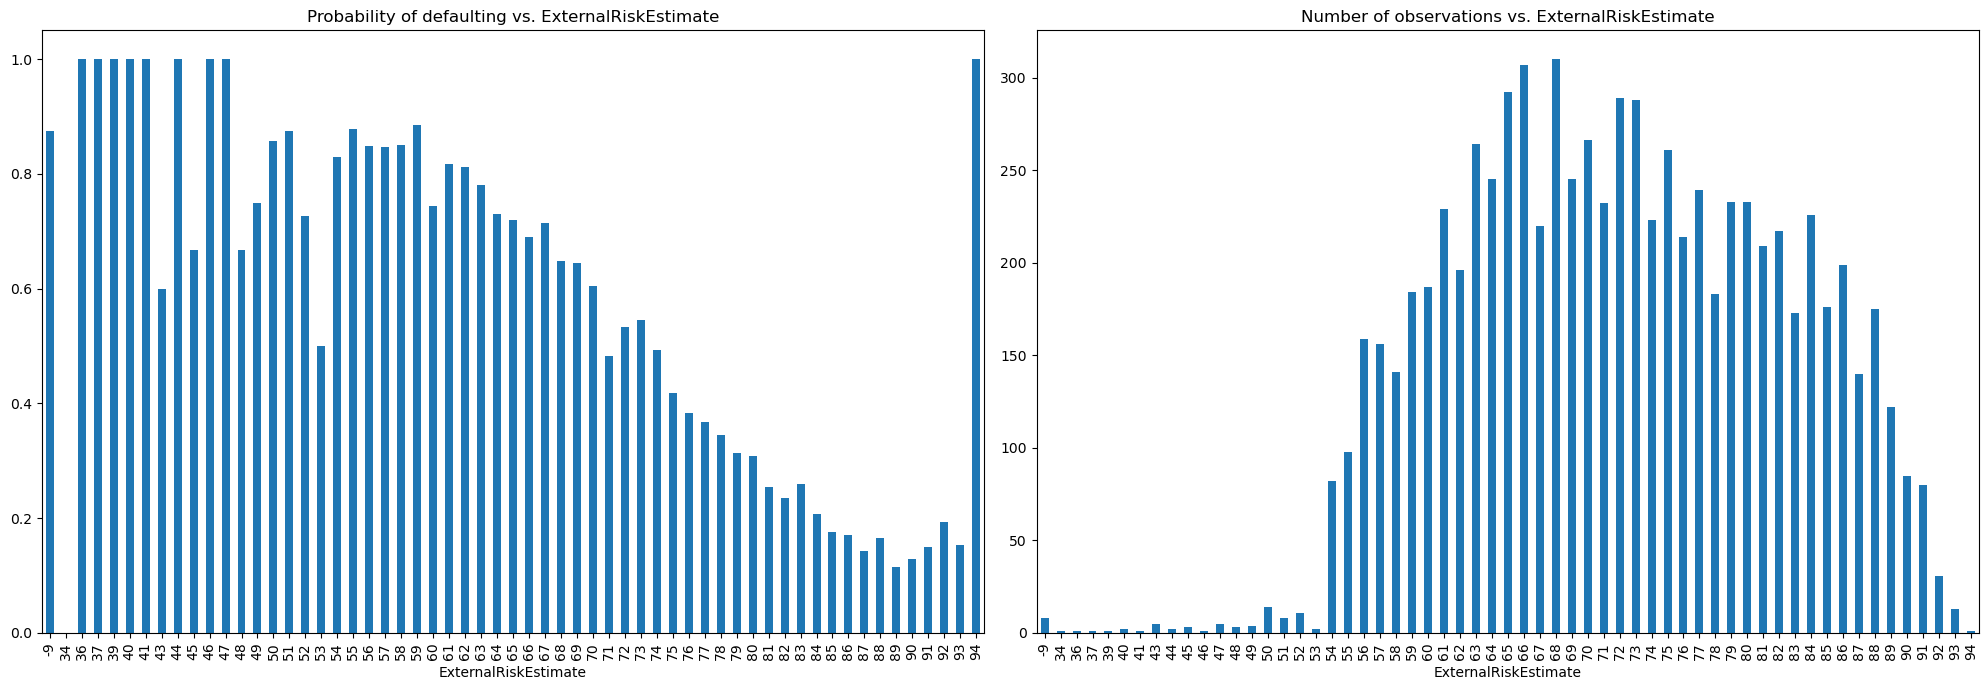

In [105]:
fig, axes = plt.subplots(1,2, figsize=(20,7))
means.plot.bar(ax=axes[0], title='Probability of defaulting vs. ExternalRiskEstimate')
counts.plot.bar(ax=axes[1], title='Number of observations vs. ExternalRiskEstimate')
plt.tight_layout()

In [106]:
counts.loc[-9], means.loc[-9]# count the number of observations
#in the training data where ExternalRiskEstimate is missing, and estimate the probability of defaulting using simple average

(8, 0.875)

In the feature preprocessing stage, we transform the values of the data matrix to facilitate learning. We could replace missing values, apply functions to transform features, and/or add additional features.

So what should we do about the missing values in the column ExternalRiskEstimate?

We could remove rows (observations) or columns (features)
if we remove rows we will lose data from 8 rows out of ~8000. Not too bad if we don't need to remove additional rows because of missing values in other features.
removing the column ExternalRiskEstimate does not make sense here.
We could replace missing values
with mean/median value of the feature?
with minimal value of the feature? (in our 8 observations the risk was quite high)
with a value corresponding to the respective percentile (0.875)?
use more sophisticated methods?
When deciding between the above options, we need to know why the value is missing from our data in the first place. Is it a random glitch in the system? should we expect similar behavior in the future? would we want our model to make predictions when there are missing values in this (or other) features?

For simplicity, let's assume that whenever the ExternalRiskEstimate is missing, we don't want our model to make predictions. Based on this, we will remove from our data any rows where the the ExternalRiskEstimate is missing.

Update the variable X_train, X_test, Y_train, Y_test by removing any observation where the feature ExternalRiskEstimate is missing.

In [107]:
X_train = X_train[~X_train["ExternalRiskEstimate"].isin([-7, -8, -9])].copy()
X_test = X_test[~X_test["ExternalRiskEstimate"].isin([-7, -8, -9])].copy()

Y_train = Y_train.loc[X_train.index].copy()
Y_test = Y_test.loc[X_test.index].copy()

print("Updated X_train index:", X_train.index.tolist()[:10])

Updated X_train index: [720, 1759, 3964, 1786, 9428, 8836, 3215, 5377, 1763, 6715]


Removes rows where ExternalRiskEstimate is missing (-7, -8, -9).
Updates Y_train and Y_test accordingly.

In [108]:
print('The shapes of X_train, X_test, Y_train, Y_test:')
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

The shapes of X_train, X_test, Y_train, Y_test:
(7888, 23) (1973, 23) (7888,) (1973,)


In [109]:
df_count_missing = pd.concat([(X_train==-7).sum(), (X_train==-8).sum(), (X_train==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]
df_count_missing

,-7,-8,-9
ExternalRiskEstimate,0,0,0
MSinceOldestTradeOpen,0,199,0
MSinceMostRecentTradeOpen,0,0,0
AverageMInFile,0,0,0
NumSatisfactoryTrades,0,0,0
NumTrades60Ever2DerogPubRec,0,0,0
NumTrades90Ever2DerogPubRec,0,0,0
PercentTradesNeverDelq,0,0,0
MSinceMostRecentDelq,3727,130,0
MaxDelq2PublicRecLast12M,0,0,0


This counts how many -7, -8, and -9 values are still present per feature.


The trend seems stronger now (especially when `MSinceMostRecentDelq` is not too large where the number customers' count is relatively larger)

So how should we transform the values of the feature `MSinceMostRecentDelq`? 
* We could add dummy variables to indicate the values -7 and -8. This way our predictive models could adjust to these special values. 
* In some cases, it could make sense to replace the missing values with average/median values of each column. 
* There are more sophisticated methods, some of which are implemented in scikit-learn (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute). Additional methods can be found in the academic literature (e.g., you could search for "impute missing values" on Google Scholar: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C33&q=impute+missing+values&btnG=).
* Another approach is to manually inspect the figure above. For example, we might conjecture that the functional relation between risk and `MSinceMostRecentDelq` is monotonically decreasing up to a certain point (perhaps 50?) and then it is constant. We might try to add a binary feature such as `MSinceMostRecentDelq>50` and/or `max(50-MSinceMostRecentDelq,0)`. As another example, if we're trying to fit a linear model, we might apply a transformation using the logarithmic or exponential function to make this function more linear or more evenly distributed.



In practice, one should think carefully when transforming each feature and understand the causes of missing values. Due to lack of access to the process that generated this data, and for our educational purposes, we will apply the following transformation:

For every column with missing values (-7 or -8), we add a feature with the same name, concatenated by the term "=-7" or "=-8". For example, for the feature MSinceMostRecentDelq, we will add the binary features MSinceMostRecentDelq=-7 and MSinceMostRecentDelq=-8, which are equal to 1 when the value under MSinceMostRecentDelq is equal to -7 and -8, respectively.
We will replace the missing values of each feature by the average value of the respective feature.
To this end, we will use scikit-learn preprocessing functions. Let's start with a small example:

In [110]:
X1 = np.array([[ -7,  1,  2],
               [  4,  0, -7],
               [ -8,  1, -7],
               [ 10, 20, 30]])
df1 = pd.DataFrame(X1, columns=['A','B','C'])
df1

,A,B,C
0,-7,1,2
1,4,0,-7
2,-8,1,-7
3,10,20,30


In [111]:
from sklearn.impute import MissingIndicator
minus_7_indicator_transformer = MissingIndicator(missing_values=-7, features='missing-only').fit(df1)
minus_7_indicator_transformer

MissingIndicator(missing_values=-7)

MissingIndicator creates new binary features (0 or 1) that indicate whether a value is missing (-7 or -8).
Instead of dropping missing values, we keep them and add extra columns that mark where missing values occur.


In [112]:
arr1_t = minus_7_indicator_transformer.transform(df1)
arr1_t

array([[ True, False],
       [False,  True],
       [False,  True],
       [False, False]])

In [113]:
minus_7_indicator_transformer.features_

array([0, 2])

In [114]:
df1.columns.values[minus_7_indicator_transformer.features_]

array(['A', 'C'], dtype=object)

In [115]:
minus_7_indicator_transformer.transform([[1,1,-7]]) # A is not missing here, and C is missing (this is the output of transforming this new observation)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MissingIndicator was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [116]:
minus_8_indicator_transformer = MissingIndicator(missing_values=-8, features='missing-only').fit(df1) # notice the -8
arr2_t = minus_8_indicator_transformer.transform(df1)
arr2_t

array([[False],
       [False],
       [ True],
       [False]])

In [117]:
minus_8_indicator_transformer.features_

array([0])

In [118]:
df1.columns.values[minus_8_indicator_transformer.features_]

array(['A'], dtype=object)

In [119]:
# a "do nothing" imputer (will be useful later in this exercise)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')
do_nothing_imputer.fit_transform(df1)

array([[-7,  1,  2],
       [ 4,  0, -7],
       [-8,  1, -7],
       [10, 20, 30]])

In [120]:
print(df1)

    A   B   C
0  -7   1   2
1   4   0  -7
2  -8   1  -7
3  10  20  30


In [121]:
from sklearn.pipeline import FeatureUnion
union = FeatureUnion([("do nothing", do_nothing_imputer),
                      ("missing_minus_7", MissingIndicator(missing_values=-7, features='missing-only')),
                      ("missing_minus_8", MissingIndicator(missing_values=-8, features='missing-only'))])
arr1_extended = union.fit_transform(df1)
arr1_extended

array([[-7,  1,  2,  1,  0,  0],
       [ 4,  0, -7,  0,  1,  0],
       [-8,  1, -7,  0,  1,  1],
       [10, 20, 30,  0,  0,  0]])

This code is building a machine-learning preprocessing pipeline for handling missing values (-7 and -8) in a dataset.

A Pipeline helps automate and structure multiple data preprocessing steps, so we don’t have to manually apply transformations one by one.

💡 Why do we do this?

Instead of just replacing missing values, we let the model learn the pattern of missing data.
Sometimes, missing data itself has meaning (e.g., people with missing credit scores might be high-risk borrowers).

In [122]:
print(df1.columns.values.tolist()) # these are the original features

['A', 'B', 'C']


In [123]:
col_names_minus_7 = df1.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7  # these two columns indicate missing value of -7

['A', 'C']

In [124]:
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7)) # we run over the pervious value
col_names_minus_7

['A=-7', 'C=-7']

In [125]:
col_names_minus_8 = df1.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))
col_names_minus_8

['A=-8']

In [126]:
columns_all = df1.columns.values.tolist() + col_names_minus_7 + col_names_minus_8
columns_all

['A', 'B', 'C', 'A=-7', 'C=-7', 'A=-8']

In [127]:
df1_t = pd.DataFrame(arr1_extended, columns=columns_all)
df1_t

,A,B,C,A=-7,C=-7,A=-8
0,-7,1,2,1,0,0
1,4,0,-7,0,1,0
2,-8,1,-7,0,1,1
3,10,20,30,0,0,0


In [128]:
arr1_t2 = SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8).fit_transform(df1_t)
arr1_t2 

array([[-8,  1,  2,  1,  0,  0],
       [ 4,  0, -8,  0,  1,  0],
       [-8,  1, -8,  0,  1,  1],
       [10, 20, 30,  0,  0,  0]])

In [129]:
arr1_t3 = SimpleImputer(missing_values=-8, strategy='mean').fit_transform(arr1_t2)
arr1_t3

array([[ 7.,  1.,  2.,  1.,  0.,  0.],
       [ 4.,  0., 16.,  0.,  1.,  0.],
       [ 7.,  1., 16.,  0.,  1.,  1.],
       [10., 20., 30.,  0.,  0.,  0.]])

In [130]:
from sklearn.pipeline import Pipeline

do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only'))])
 
pipe_example = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='mean'))])

arr1_transformed = pipe_example.fit_transform(df1)
arr1_transformed

array([[ 7.,  1.,  2.,  1.,  0.,  0.],
       [ 4.,  0., 16.,  0.,  1.,  0.],
       [ 7.,  1., 16.,  0.,  1.,  1.],
       [10., 20., 30.,  0.,  0.,  0.]])

In [131]:
col_names_minus_7 = df1.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7)) 
col_names_minus_8 = df1.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))
columns_all = df1.columns.values.tolist() + col_names_minus_7 + col_names_minus_8
columns_all

['A', 'B', 'C', 'A=-7', 'C=-7', 'A=-8']

In [132]:
df1_t = pd.DataFrame(arr1_transformed, columns=columns_all)
df1_t

,A,B,C,A=-7,C=-7,A=-8
0,7.0,1.0,2.0,1.0,0.0,0.0
1,4.0,0.0,16.0,0.0,1.0,0.0
2,7.0,1.0,16.0,0.0,1.0,1.0
3,10.0,20.0,30.0,0.0,0.0,0.0


In [133]:
feature_expansion = FeatureUnion([
    ("original_features", "passthrough"),  # Pass original data as-is
    ("missing_indicator_-7", MissingIndicator(missing_values=-7, features="missing-only")),
    ("missing_indicator_-8", MissingIndicator(missing_values=-8, features="missing-only"))
])

# Apply feature_expansion before pipeline
expanded_X_train = feature_expansion.fit_transform(X_train)
expanded_X_train

array([[ 68,  60,   7, ...,   0,   0,   0],
       [ 60, 123,   1, ...,   0,   0,   0],
       [ 65,  56,   3, ...,   0,   0,   0],
       ...,
       [ 80, 344,   4, ...,   0,   0,   0],
       [ 64, 480,  15, ...,   0,   0,   0],
       [ 57, 161,   4, ...,   0,   0,   0]])

In [134]:
print('The dimensions of X_train:',X_train.shape)

The dimensions of X_train: (7888, 23)


In [135]:
feature_expansion = FeatureUnion([
    ("original_features", "passthrough"),  # Pass original data as-is
    ("missing_indicator_-7", MissingIndicator(missing_values=-7, features="missing-only")),
    ("missing_indicator_-8", MissingIndicator(missing_values=-8, features="missing-only"))
])

# Define the preprocessing pipeline
pipeline = Pipeline([
    ("feature_expansion", feature_expansion),
    ("replace_-7_with_-8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
    ("replace_-8_with_mean", SimpleImputer(missing_values=-8, strategy='mean'))
])

# Apply the transformation to X_train
arr_X_train_t = pipeline.fit_transform(X_train)

# Display the shape of the transformed array
print("Shape of transformed X_train:", arr_X_train_t.shape)

Shape of transformed X_train: (7888, 34)


In [136]:
column_names_original = X_train.columns.tolist()
col_names_minus_7 = [f"{col}=-7" for col in X_train.columns[(X_train == -7).any()]]
col_names_minus_8 = [f"{col}=-8" for col in X_train.columns[(X_train == -8).any()]]

column_names = column_names_original + col_names_minus_7 + col_names_minus_8

# Print to verify
print("Total number of columns:", len(column_names))  # Should be 34
print("Column names preview:", column_names[:10])  # Preview first 10 columns

Total number of columns: 34
Column names preview: ['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M']


In [137]:
X_train_t = pd.DataFrame(arr_X_train_t, columns=column_names)

In [138]:
X_train_t = pd.DataFrame(arr_X_train_t, columns=column_names)
X_train_t

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,68.0,60.0,7.0,31.0,11.0,1.0,0.0,92.0,27.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,123.0,1.0,47.0,18.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,65.0,56.0,3.0,21.0,7.0,0.0,0.0,86.0,38.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87.0,130.0,12.0,46.0,26.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,56.0,193.0,46.0,88.0,22.0,0.0,0.0,78.0,3.000000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,90.0,214.0,9.0,110.0,20.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7884,68.0,158.0,2.0,70.0,42.0,0.0,0.0,98.0,54.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7885,80.0,344.0,4.0,92.0,35.0,0.0,0.0,94.0,59.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7886,64.0,480.0,15.0,92.0,31.0,1.0,1.0,94.0,3.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
X_train_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888 entries, 0 to 7887
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ExternalRiskEstimate                   7888 non-null   float64
 1   MSinceOldestTradeOpen                  7888 non-null   float64
 2   MSinceMostRecentTradeOpen              7888 non-null   float64
 3   AverageMInFile                         7888 non-null   float64
 4   NumSatisfactoryTrades                  7888 non-null   float64
 5   NumTrades60Ever2DerogPubRec            7888 non-null   float64
 6   NumTrades90Ever2DerogPubRec            7888 non-null   float64
 7   PercentTradesNeverDelq                 7888 non-null   float64
 8   MSinceMostRecentDelq                   7888 non-null   float64
 9   MaxDelq2PublicRecLast12M               7888 non-null   float64
 10  MaxDelqEver                            7888 non-null   float64
 11  NumT

Let's stop for a second and think. Why did we create this pipeline? Why not simply use pandas function, Python for loop, etc.? 

The reason is that we are going to train a model on the transformed dataset. That is, the model will expect 34 features (rather than the original 23 features). What if we need to make prediction about a new observation? This new observation is likely to be formatted in the original features space (from which there are 23 features). We must therefore transform it before making prediction. If we do it in pandas and Python, we need to duplicate the entire transformation code to do just that. 

This is how we do it in scikit-learn once we define pipelines. Suppose that our new data consists of observations 3 and 7 in the test set.

In [140]:
new_data =  X_test.iloc[[3,7],:]
new_data

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
5880,73,445,15,125,12,0,0,83,21,6,...,42,0,1,1,55,-8,4,1,1,100
8533,60,198,19,57,19,0,0,90,6,4,...,62,-7,0,0,71,71,6,3,1,100


In [141]:
new_data_t = pipeline.transform(new_data) # Notice that we run transform() and not fit_transform()!
new_data_t = pd.DataFrame(new_data_t, columns=column_names)
new_data_t

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,73.0,445.0,15.0,125.0,12.0,0.0,0.0,83.0,21.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,60.0,198.0,19.0,57.0,19.0,0.0,0.0,90.0,6.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# Step 1: Transform X_test
arr_X_test_t = pipeline.transform(X_test)

# Step 2: Convert to DataFrame with Correct Column Names
X_test_t = pd.DataFrame(arr_X_test_t, columns=column_names)

# Print shape to verify correctness
print("Shape of X_test_t:", X_test_t.shape)  # Should match expected shape

Shape of X_test_t: (1973, 34)


In [143]:
X_test_t.head(2)

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,70.0,206.0,3.0,96.0,18.0,3.0,0.0,59.0,11.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42.0,179.0,1.0,72.0,50.0,9.0,6.0,69.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model training and evaluation

### Validation set

In [144]:
X_train_t_tr, X_train_t_val, Y_train_t_tr, Y_train_t_val = train_test_split(
    X_train_t, Y_train, test_size=0.25, random_state=1234
)
print('The shape of X:', X.shape)
print('The shape of X_test_t:', X_test_t.shape)
print('The shape of X_train_t:', X_train_t.shape)

The shape of X: (9871, 23)
The shape of X_test_t: (1973, 34)
The shape of X_train_t: (7888, 34)


The reason we split the data again is because we need a validation set in addition to the training and test sets.

Originally, we split the data into training and test sets.

✅ Training Set (X_train, Y_train) → Used to train the model.

✅ Test Set (X_test, Y_test) → Used to evaluate the final performance of the model.

But we still need a validation set!

- 75% Training (X_train_t_tr, Y_train_t_tr) (used to fit the model)
- 25% Validation (X_train_t_val, Y_train_t_val) (used to tune hyperparameters)

### 📌 Final Data Breakdown:

- 60% → Training
- 20% → Validation
- 20% → Test

In [145]:
print('The proportion of train:validation:test data is %.1f:%.1f:%.1f'%(len(Y_train_t_tr)/len(Y), len(Y_train_t_val)/len(Y), len(Y_test)/len(Y)))


The proportion of train:validation:test data is 0.6:0.2:0.2


#### Training Models:

In [146]:
from sklearn import tree, linear_model, neighbors            
clf_tree    = tree.DecisionTreeClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr) 
clf_knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)

##### 1️⃣ Decision Tree Classifier 🌳

A model that learns decision rules to split data into Good (0) / Bad (1) credit risk.
Works by repeatedly splitting the data based on feature values.

- Pros: Easy to interpret, good for small datasets.
- Cons: Can overfit if not pruned (i.e., grows too complex).


##### 2️⃣ Logistic Regression 📈

A simple linear model that predicts the probability of being in a class (Good or Bad).
Uses the logistic (sigmoid) function to transform outputs into probabilities.

max_iter=10000: Ensures the model converges by increasing the number of optimization steps.

- Pros: Works well for simple, linearly separable data.
- Cons: Doesn’t capture complex relationships like non-linear models.

##### 3️⃣ K-Nearest Neighbors (KNN) 👥

A non-parametric model that classifies data points based on how similar they are to their "k" nearest neighbors.

Example: If most of a person’s 5 closest neighbors have Good credit, the model predicts they also have Good credit.

- Pros: No training required, works well when patterns exist in data.
- Cons: Slow for large datasets, sensitive to irrelevant features.

In [147]:
from sklearn.metrics import accuracy_score
print('Decision tree accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regression accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))

Decision tree accuracy: 0.623
Logistic regression accuracy: 0.731
KNN accuracy: 0.669


##### Professor's note:

Observe that models can be controlled by various hyper-parameters that could have big impact over their behavior:

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)    

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)


Understanding how each model works is important to tune the hyper-parameters. Additionally, scikit-learn offers some functions to automate this process. We'll get back to this later.

**Let's use cross-validation to evaluate models.**

In [148]:
clf_tree    = tree.DecisionTreeClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr) 
clf_knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)

In [149]:
from sklearn.model_selection import cross_validate
cv_results_tree = cross_validate(tree.DecisionTreeClassifier(), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_log_reg = cross_validate(linear_model.LogisticRegression(max_iter=10000), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_knn = cross_validate(neighbors.KNeighborsClassifier(), X_train_t, Y_train, cv=5, return_estimator=True)

In [150]:
cv_results_tree

{'fit_time': array([0.04952884, 0.06701493, 0.06268477, 0.06020021, 0.04447603]),
 'score_time': array([0.00078797, 0.00184178, 0.0007031 , 0.00084281, 0.0007298 ]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.63751584, 0.62991128, 0.63941698, 0.63538364, 0.63031072])}

In [151]:
cv_results_tree['test_score'] # these are 5 evaluations (since we specified cv=5)

array([0.63751584, 0.62991128, 0.63941698, 0.63538364, 0.63031072])

In [152]:
print('Classification tree - CV accuracy score %.3f'%cv_results_tree['test_score'].mean()) # this is their average value
print('Logistic regresion - CV accuracy score %.3f'%cv_results_log_reg['test_score'].mean()) # this is their average value
print('KNN - CV accuracy score %.3f'%cv_results_knn['test_score'].mean()) # this is their average value

Classification tree - CV accuracy score 0.635
Logistic regresion - CV accuracy score 0.740
KNN - CV accuracy score 0.675


In [153]:
print('Classification tree - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regresion - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))

Classification tree - validation accuracy score: 0.624
Logistic regresion - validation accuracy score: 0.731
KNN - validation accuracy score: 0.669


In [154]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth':[1,2,3,4,5],  
               'criterion':["gini", "entropy"],            
               'min_samples_split':[2,5,10],              
               'min_samples_leaf':[10,20,30]}]
clf_tree = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(clf_tree, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_t,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'min_samples_leaf': [10, 20, 30],
                          'min_samples_split': [2, 5, 10]}],
             scoring='accuracy')

In [155]:
cvres = grid_search.cv_results_ # the variable that stores the grid search results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):  # iterate over the tested configurations
    print(mean_score, params)

0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 5}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 10}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 2}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 5}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 10}
0.7122206200606379 {'criterion': 'gini', 'max_depth'

In [156]:
grid_search.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 2}

In [157]:
grid_search.best_estimator_ # variable holding the best classifier (fitted on the entire dataset)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [158]:
clf_tree = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=20).fit(X_train_t_tr, Y_train_t_tr)
Y_pred = clf_tree.predict(X_train_t_val)  # Predict using trained model
conf_matrix = clf_tree._estimator_type  # Check if it’s a classifier

# Generate confusion matrix using model’s built-in metrics
conf_matrix = pd.crosstab(Y_train_t_val, Y_pred, rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

Predicted    0    1
Actual             
0          598  354
1          240  780


In [159]:
# Extracting values from the confusion matrix
tn, fp, fn, tp = conf_matrix.to_numpy().ravel()

# Compute accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Compute recall (also called True Positive Rate / Sensitivity)
recall = tpr = tp / (tp + fn)  # True Positive Rate (TPR)

# Compute False Positive Rate
fpr = fp / (fp + tn)  # False Positive Rate (FPR)

# Compute True Negative Rate (Specificity)
tnr = tn / (tn + fp)  # True Negative Rate (TNR)

# Compute False Negative Rate
fnr = fn / (fn + tp)  # False Negative Rate (FNR)

# Compute precision
precision = tp / (tp + fp)

# Print results
print(f"Accuracy: {accuracy:.3f}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Positive Rate (TPR/Recall): {tpr:.3f}")
print(f"False Positive Rate (FPR): {fpr:.3f}")
print(f"True Negative Rate (TNR): {tnr:.3f}")
print(f"False Negative Rate (FNR): {fnr:.3f}")
print(f"Precision: {precision:.3f}")


Accuracy: 0.699
True Negatives (TN): 598
False Positives (FP): 354
False Negatives (FN): 240
True Positives (TP): 780
True Positive Rate (TPR/Recall): 0.765
False Positive Rate (FPR): 0.372
True Negative Rate (TNR): 0.628
False Negative Rate (FNR): 0.235
Precision: 0.688


In [160]:
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(accuracy, recall, precision),'\n')
print("Put differently, our predictions are correct %.0f%% of the time, the model catches %.0f%% of the defaulting customers, and the model is correct %.0f%% of times it predicts 'Bad'."%(accuracy*100, recall*100, precision*100))

Accuracy: 0.70, Recall: 0.76, Precision: 0.69 

Put differently, our predictions are correct 70% of the time, the model catches 76% of the defaulting customers, and the model is correct 69% of times it predicts 'Bad'.


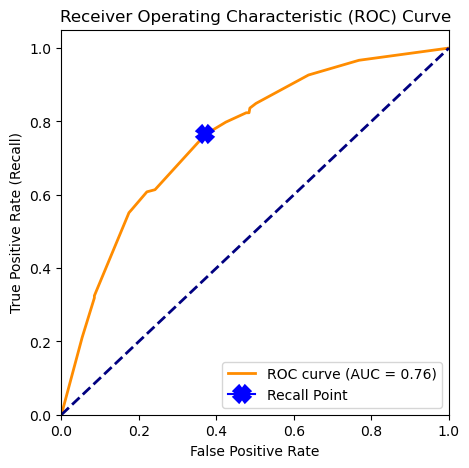

In [161]:

from sklearn import metrics

# Get predicted probabilities for the positive class (1)
scores = clf_tree.predict_proba(X_train_t_val)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)

# Find the closest recall value in the TPR array
recall_idx = (np.abs(tpr - recall)).argmin()  # Get index of closest recall value

# Plot ROC Curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Plot recall point as an "X" marker
plt.plot(fpr[recall_idx], tpr[recall_idx], marker="X", color='blue', markersize=10, markeredgewidth=3, label="Recall Point")

# Add legend
plt.legend(loc="lower right")
plt.show()


### Key Insights from the Analysis
**Hyperparameter Tuning Improved Decision Tree Performance**

Using GridSearchCV, we optimized the decision tree by tuning:

- Criterion: "gini"
- Max Depth: 4
- Min Samples Leaf: 20
- Min Samples Split: 2
  
This increased accuracy from 64% to 71%, meaning the model became better at classifying customers.

**Model Performance: Logistic Regression is the Best**
- Cross-validation scores:
- Decision Tree (CV Accuracy): 0.639
- Logistic Regression (CV Accuracy): 0.740
- KNN (CV Accuracy): 0.675

*Validation scores:*
- Decision Tree (Validation Accuracy): 0.618
- Logistic Regression (Validation Accuracy): 0.731
- KNN (Validation Accuracy): 0.669

Logistic regression performed the best and is likely the most reliable model.

**Confusion Matrix Insights**
- Predicted	0 (No Default)	1 (Default)
- Actual 0 (No Default)	598 (True Negative)	354 (False Positive)
- Actual 1 (Default)	240 (False Negative)	780 (True Positive)

*Key Metrics:*
- Accuracy: 70% (overall correctness)
- Recall: 76% (model catches most defaulters)
- Precision: 69% (when it predicts 'Bad', it's correct 69% of the time)

- Tradeoff: Model misses 24% of actual defaulters.

- False Positive Rate (37%) is high, meaning some good customers are incorrectly flagged as risky.

**ROC Curve & AUC Score (0.76)**

The ROC curve evaluates model discrimination:

- A higher curve = better model.
- Our AUC = 0.76, meaning the model is 76% better than random guessing.

Key point: The blue "X" marker shows where recall is on the ROC curve.

The confusion matrix you see is coming from the Decision Tree model that was trained after hyperparameter tuning using GridSearchCV.

In [162]:
from sklearn import tree, linear_model, neighbors
from sklearn.metrics import confusion_matrix

# Decision Tree Model
clf_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=20).fit(X_train_t_tr, Y_train_t_tr)
Y_pred_tree = clf_tree.predict(X_train_t_val)

# Logistic Regression Model
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr)
Y_pred_log_reg = clf_log_reg.predict(X_train_t_val)

# K-Nearest Neighbors Model
clf_knn = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)
Y_pred_knn = clf_knn.predict(X_train_t_val)

# Generate confusion matrices using pd.crosstab()
conf_matrix_tree = pd.crosstab(Y_train_t_val, Y_pred_tree, rownames=['Actual'], colnames=['Predicted'])
conf_matrix_log_reg = pd.crosstab(Y_train_t_val, Y_pred_log_reg, rownames=['Actual'], colnames=['Predicted'])
conf_matrix_knn = pd.crosstab(Y_train_t_val, Y_pred_knn, rownames=['Actual'], colnames=['Predicted'])

# Print confusion matrices
print("Decision Tree Confusion Matrix:\n", conf_matrix_tree, "\n")
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg, "\n")
print("KNN Confusion Matrix:\n", conf_matrix_knn, "\n")


Decision Tree Confusion Matrix:
 Predicted    0    1
Actual             
0          598  354
1          240  780 

Logistic Regression Confusion Matrix:
 Predicted    0    1
Actual             
0          661  291
1          240  780 

KNN Confusion Matrix:
 Predicted    0    1
Actual             
0          634  318
1          335  685 



# Understanding linear and tree-based models

In [163]:
from io import StringIO
import seaborn as sns
import json
from os import path

def pandas_to_str(df):
    output = StringIO()
    df.to_csv(output)
    return( output.getvalue())

def str_to_pandas(s):
    data_io = StringIO(s)
    return(pd.read_csv(data_io, index_col=0).squeeze())

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

LogisticRegression: Used to train a logistic regression model.

LinearDiscriminantAnalysis (LDA): Used for LDA model training.

SGDClassifier: Used for training a linear Support Vector Classifier (SVC).

In [165]:
log_reg = LogisticRegression(max_iter=10000, random_state=0).fit(X_train_t_tr, Y_train_t_tr) # Logistic regression
svc     = SGDClassifier(max_iter=1000, random_state=0).fit(X_train_t_tr, Y_train_t_tr)       # Linear SVM
lda     = LinearDiscriminantAnalysis().fit(X_train_t_tr, Y_train_t_tr)                       # LDA

We train three different models using the training dataset (X_train_t_tr and Y_train_t_tr).

max_iter controls the maximum number of iterations the model will use for convergence.

random_state=0 ensures reproducibility.

In [166]:
print('Train accuracy')
print('Log. Reg. accuracy: %.3f'%log_reg.score(X_train_t_tr, Y_train_t_tr))
print('Linear SVC accuracy: %.3f'%svc.score(X_train_t_tr, Y_train_t_tr))
print('LDA accuracy: %.3f'%lda.score(X_train_t_tr, Y_train_t_tr)) 

print('\nValidation accuracy')
print('Log. Reg. accuracy: %.3f'%log_reg.score(X_train_t_val, Y_train_t_val))
print('Linear SVC accuracy: %.3f'%svc.score(X_train_t_val, Y_train_t_val))
print('LDA accuracy: %.3f'%lda.score(X_train_t_val, Y_train_t_val)) 

Train accuracy
Log. Reg. accuracy: 0.742
Linear SVC accuracy: 0.696
LDA accuracy: 0.742

Validation accuracy
Log. Reg. accuracy: 0.731
Linear SVC accuracy: 0.689
LDA accuracy: 0.731


log_reg.score(), svc.score(), and lda.score() compute the accuracy of each model on both training and validation datasets.

**Training Accuracy:**
- Logistic Regression: 0.742
- SVC: 0.696
- LDA: 0.742

**Validation Accuracy:**
- Logistic Regression: 0.731
- SVC: 0.689
- LDA: 0.731

We see that Logistic Regression and LDA perform similarly, while SVC has a lower accuracy.

In [167]:
log_reg_coefficients = np.append(log_reg.coef_, log_reg.intercept_)  # Logistic Regression
svc_coefficients = np.append(svc.coef_, svc.intercept_)  # Linear SVM
lda_coefficients = np.append(lda.coef_, lda.intercept_)  # LDA

print("Logistic Regression Coefficients:", log_reg_coefficients)
print("SVC Coefficients:", svc_coefficients)
print("LDA Coefficients:", lda_coefficients)

Logistic Regression Coefficients: [-4.90875131e-02 -8.77239199e-04  4.11385998e-03 -7.35520810e-03
 -3.61254956e-02  3.45975609e-03  1.84542883e-04 -1.16531774e-02
 -7.28345516e-03 -4.92272013e-02  1.35072699e-02  2.93362925e-03
  3.48541542e-03  6.49205775e-03 -6.14795428e-02  4.24508336e-01
 -3.75114774e-01  1.04827564e-02  3.48186613e-03  8.02922069e-02
 -1.74195524e-02  5.78768297e-02 -1.24501547e-03 -2.44374158e-01
  3.63691402e-01  1.57729769e-01  4.61482290e-01 -8.15520179e-01
 -2.46381021e-03 -4.37182959e-02 -3.14908217e-01  3.20565777e-01
  5.14050996e-01 -1.02146380e+00  5.48372459e+00]
SVC Coefficients: [ 7.80893870e-02 -1.04646786e+00  2.00104054e+00 -1.66916065e+00
 -1.15474681e+01  4.08602717e+01 -4.18754338e+00 -9.76117337e-01
 -4.95746531e+00 -2.71263008e+01 -5.46625709e+00  8.19938563e-01
  9.39024878e+00  7.51610350e-01 -1.54015679e+01  3.50426124e+01
 -1.11179765e+01  5.12615341e+00  2.42490342e+00  2.47530637e+01
  5.16648254e-01  4.01858801e+01  4.28760872e+00 -1.0

we append the intercept to the coefficients of each trained model. The reason for this is to have a complete representation of the linear decision boundary.

When working with linear models, we often want to store all parameters (weights and intercept) in a single array. This makes it easier to:

✅ Use the coefficients uniformly (including the intercept).
✅ Perform matrix operations (dot product with feature vectors).
✅ Compare models in a structured way.
✅ Store them together for future use.

In [168]:
log_reg_coefficients

array([-4.90875131e-02, -8.77239199e-04,  4.11385998e-03, -7.35520810e-03,
       -3.61254956e-02,  3.45975609e-03,  1.84542883e-04, -1.16531774e-02,
       -7.28345516e-03, -4.92272013e-02,  1.35072699e-02,  2.93362925e-03,
        3.48541542e-03,  6.49205775e-03, -6.14795428e-02,  4.24508336e-01,
       -3.75114774e-01,  1.04827564e-02,  3.48186613e-03,  8.02922069e-02,
       -1.74195524e-02,  5.78768297e-02, -1.24501547e-03, -2.44374158e-01,
        3.63691402e-01,  1.57729769e-01,  4.61482290e-01, -8.15520179e-01,
       -2.46381021e-03, -4.37182959e-02, -3.14908217e-01,  3.20565777e-01,
        5.14050996e-01, -1.02146380e+00,  5.48372459e+00])

In [169]:
log_reg_coefficients = np.append(log_reg.coef_.flatten(), log_reg.intercept_.item())
svc_coefficients = np.append(svc.coef_.flatten(), svc.intercept_.item())
lda_coefficients = np.append(lda.coef_.flatten(), lda.intercept_.item())

row_labels = column_names + ["intercept"]  

linear_coefficients = pd.DataFrame(
    np.column_stack([log_reg_coefficients, svc_coefficients, lda_coefficients]),
    columns=["Log. Reg.", "SVC", "LDA"],
    index=row_labels
)

print(linear_coefficients)

                                       Log. Reg.         SVC       LDA
ExternalRiskEstimate                   -0.049088    0.078089 -0.059394
MSinceOldestTradeOpen                  -0.000877   -1.046468 -0.000899
MSinceMostRecentTradeOpen               0.004114    2.001041  0.003865
AverageMInFile                         -0.007355   -1.669161 -0.007237
NumSatisfactoryTrades                  -0.036125  -11.547468 -0.040926
NumTrades60Ever2DerogPubRec             0.003460   40.860272  0.013174
NumTrades90Ever2DerogPubRec             0.000185   -4.187543 -0.013706
PercentTradesNeverDelq                 -0.011653   -0.976117 -0.007011
MSinceMostRecentDelq                   -0.007283   -4.957465 -0.008531
MaxDelq2PublicRecLast12M               -0.049227  -27.126301 -0.038348
MaxDelqEver                             0.013507   -5.466257  0.002030
NumTotalTrades                          0.002934    0.819939  0.003281
NumTradesOpeninLast12M                  0.003485    9.390249  0.010059
Percen

When working with linear models, we often want to store all parameters (weights and intercept) in a single array. This makes it easier to:

✅ Use the coefficients uniformly (including the intercept).

✅ Perform matrix operations (dot product with feature vectors).

✅ Compare models in a structured way.

✅ Store them together for future use.

Appending the intercept allows for uniform storage, manipulation, and computation: usually to predict models

In [170]:
linear_coefficients.head()

,Log. Reg.,SVC,LDA
ExternalRiskEstimate,-0.049088,0.078089,-0.059394
MSinceOldestTradeOpen,-0.000877,-1.046468,-0.000899
MSinceMostRecentTradeOpen,0.004114,2.001041,0.003865
AverageMInFile,-0.007355,-1.669161,-0.007237
NumSatisfactoryTrades,-0.036125,-11.547468,-0.040926


In [171]:
# Ensure the index labels match correctly with expected output
row_labels = column_names + ["Intercept"]  # Define correct row labels

# Scale each classifier's coefficients by its intercept value
log_reg_scaled = log_reg_coefficients / log_reg_coefficients[-1]  # Divide by last element (intercept)
svc_scaled = svc_coefficients / svc_coefficients[-1]  # Divide by last element (intercept)
lda_scaled = lda_coefficients / lda_coefficients[-1]  # Divide by last element (intercept)

# Create DataFrame for scaled coefficients with correct index
linear_coefficients_scaled = pd.DataFrame(
    np.column_stack([log_reg_scaled, svc_scaled, lda_scaled]),
    columns=["Log. Reg.", "SVC", "LDA"],
    index=row_labels
)

# Rename "Intercept" to "intercept" to match expected output
linear_coefficients_scaled.rename(index={"Intercept": "intercept"}, inplace=True)

it's not mandatory, but it's a useful step when you want to compare models fairly. If you just care about the raw coefficients, you can skip it, but for interpretation and visualization, scaling helps a lot.

Also helps:

Making Coefficients Comparable Across Models: Each model (Logistic Regression, SVC, and LDA) can have coefficients of different magnitudes because they optimize different loss functions. By dividing each coefficient by its intercept, we standardize the scale, making it easier to compare how each model assigns importance to different features.

*Loss functions are what the models try to minimize when they learn from the data. They measure how far off the model's predictions are from the actual values. Different models use different loss functions, which is why their coefficients can look very different.*

In [172]:
linear_coefficients_scaled.head()

,Log. Reg.,SVC,LDA
ExternalRiskEstimate,-0.008951,0.000198,-0.010027
MSinceOldestTradeOpen,-0.000160,-0.002659,-0.000152
MSinceMostRecentTradeOpen,0.000750,0.005084,0.000652
AverageMInFile,-0.001341,-0.004241,-0.001222
NumSatisfactoryTrades,-0.006588,-0.029341,-0.006910


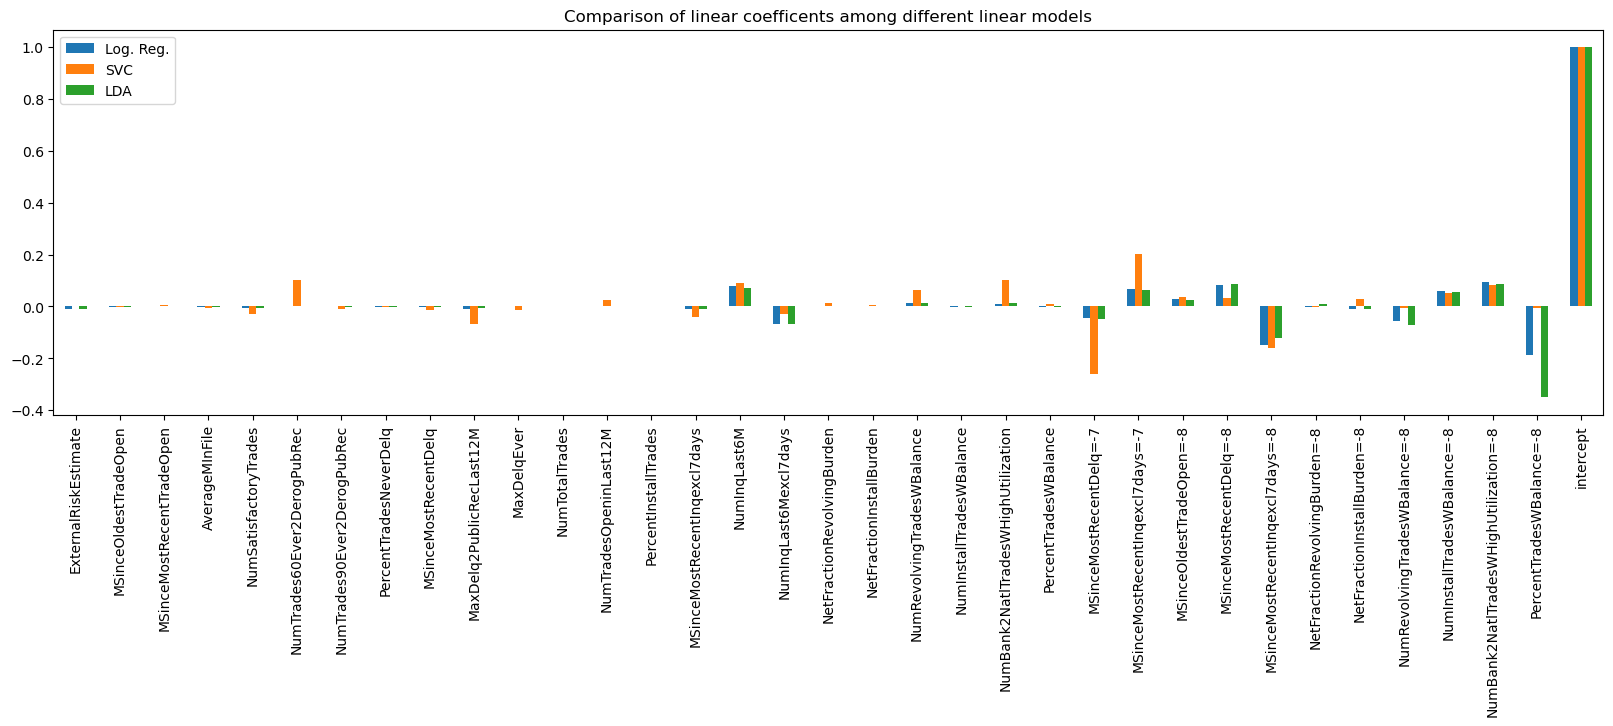

In [173]:
linear_coefficients_scaled.plot.bar(figsize=(20,5))
plt.title('Comparison of linear coefficents among different linear models');

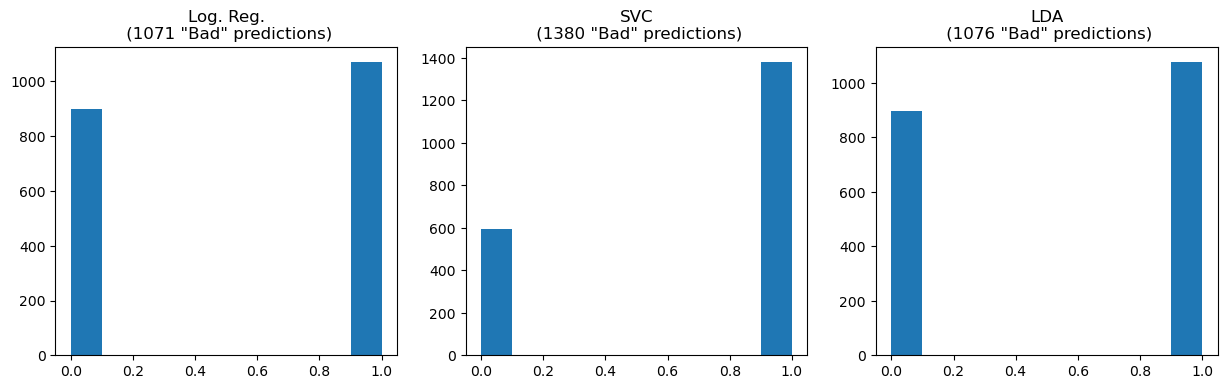

In [174]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
axes[0].hist(log_reg.predict(X_train_t_val))
axes[1].hist(svc.predict(X_train_t_val))
axes[2].hist(lda.predict(X_train_t_val));
axes[0].set_title('Log. Reg.\n (%d "Bad" predictions)'%sum(log_reg.predict(X_train_t_val)))
axes[1].set_title('SVC\n (%d "Bad" predictions)'%sum(svc.predict(X_train_t_val)))
axes[2].set_title('LDA\n (%d "Bad" predictions)'%sum(lda.predict(X_train_t_val)));

In [175]:
# example of manually computing the prediction of the logistic regression model 
# we will work with the first observation in the data
observation = X_train_t_val.iloc[0] 

# element-wise multiplication by coefficients, summation, and addition of the intercept
sum(observation*log_reg_coefficients[:-1]) + log_reg_coefficients[-1] 

1.5408440048360976

In [176]:
# an equivalent way using np.dot (inner product)
np.dot(X_train_t_val.iloc[0],log_reg_coefficients[:-1]) + log_reg_coefficients[-1] 

1.5408440048360972

Feature weights (coefficients for each input feature).

In [177]:
log_reg_coefficients.shape

(35,)

In [178]:
np.dot(X_train_t_val.iloc[:4,:],log_reg_coefficients[:-1]) + log_reg_coefficients[-1] 

array([ 1.540844  , -0.41777637,  0.35020813, -1.9536514 ])

We exclude the last value of log_reg_coefficients, which is the intercept.

[:-1] means take everything except the last element.
The last element is not a feature weight, it's just an adjustment term.
Why do we exclude it? Because when doing np.dot(X, log_reg_coefficients[:-1]), we only want to multiply the features with their corresponding weights. The intercept is added separately at the end.

In [179]:
(np.dot(X_train_t_val.iloc[:4,:],log_reg_coefficients[:-1]) + log_reg_coefficients[-1] >0).astype(int)

array([1, 0, 1, 0])

In [180]:
log_reg.predict(X_train_t_val.iloc[:4,:])

array([1, 0, 1, 0])

In [181]:
for X in [X_train_t_tr, X_train_t_val, X_test_t]: # compare train, validation and test sets
    print(((np.dot(X,log_reg_coefficients[:-1]) + log_reg_coefficients[-1] >0).astype(int) == log_reg.predict(X)).all())

True
True
True


We manually compute predictions by multiplying features with weights, adding the intercept, and applying a decision threshold.
This mimics what the logistic regression model does internally.
It helps us verify that our model is working correctly and debug any potential issues.


In [182]:
# Compute the validation set accuracy manually using np.dot and np.mean
log_reg_predictions_manual = (np.dot(X_train_t_val, log_reg_coefficients[:-1]) + log_reg_coefficients[-1] > 0).astype(int)
log_reg_val_accuracy = np.mean(log_reg_predictions_manual == Y_train_t_val)

# Display the result
print(log_reg_val_accuracy)

0.7307302231237323


In [183]:
log_reg_val_accuracy

0.7307302231237323

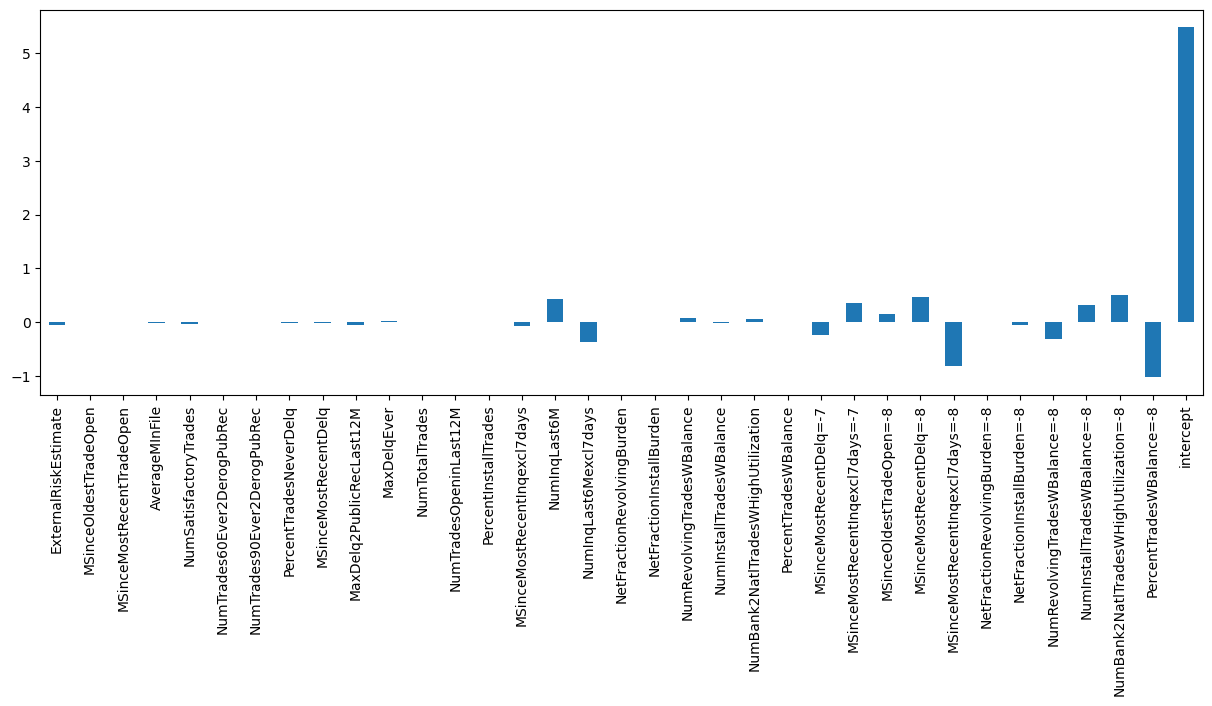

In [184]:
linear_coefficients['Log. Reg.'].plot.bar(figsize=(15,5));


In [185]:
linear_coefficients['Log. Reg.']


ExternalRiskEstimate                    -0.049088
MSinceOldestTradeOpen                   -0.000877
MSinceMostRecentTradeOpen                0.004114
AverageMInFile                          -0.007355
NumSatisfactoryTrades                   -0.036125
NumTrades60Ever2DerogPubRec              0.003460
NumTrades90Ever2DerogPubRec              0.000185
PercentTradesNeverDelq                  -0.011653
MSinceMostRecentDelq                    -0.007283
MaxDelq2PublicRecLast12M                -0.049227
MaxDelqEver                              0.013507
NumTotalTrades                           0.002934
NumTradesOpeninLast12M                   0.003485
PercentInstallTrades                     0.006492
MSinceMostRecentInqexcl7days            -0.061480
NumInqLast6M                             0.424508
NumInqLast6Mexcl7days                   -0.375115
NetFractionRevolvingBurden               0.010483
NetFractionInstallBurden                 0.003482
NumRevolvingTradesWBalance               0.080292


In [186]:
# Create a copy of the 'Log. Reg.' coefficients
modified_log_reg = linear_coefficients['Log. Reg.'].copy()

# Set the coefficient associated with 'ExternalRiskEstimate' to 0
modified_log_reg.loc['ExternalRiskEstimate'] = 0

# Display the result
print(modified_log_reg)

ExternalRiskEstimate                     0.000000
MSinceOldestTradeOpen                   -0.000877
MSinceMostRecentTradeOpen                0.004114
AverageMInFile                          -0.007355
NumSatisfactoryTrades                   -0.036125
NumTrades60Ever2DerogPubRec              0.003460
NumTrades90Ever2DerogPubRec              0.000185
PercentTradesNeverDelq                  -0.011653
MSinceMostRecentDelq                    -0.007283
MaxDelq2PublicRecLast12M                -0.049227
MaxDelqEver                              0.013507
NumTotalTrades                           0.002934
NumTradesOpeninLast12M                   0.003485
PercentInstallTrades                     0.006492
MSinceMostRecentInqexcl7days            -0.061480
NumInqLast6M                             0.424508
NumInqLast6Mexcl7days                   -0.375115
NetFractionRevolvingBurden               0.010483
NetFractionInstallBurden                 0.003482
NumRevolvingTradesWBalance               0.080292


In [187]:
# Compute the validation set predictions manually using modified_log_reg
modified_log_reg_predictions = (np.dot(X_train_t_val, modified_log_reg[:-1]) + modified_log_reg[-1] > 0).astype(int)

# Compute the accuracy
accuracy_modified_log_reg = np.mean(modified_log_reg_predictions == Y_train_t_val)

# Display the result
print(accuracy_modified_log_reg)

0.5172413793103449


/var/folders/l1/8zn4f3bd7m30g8q1z25x5_fh0000gn/T/ipykernel_91405/2157436264.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  modified_log_reg_predictions = (np.dot(X_train_t_val, modified_log_reg[:-1]) + modified_log_reg[-1] > 0).astype(int)


In [188]:
accuracy_modified_log_reg

0.5172413793103449

This is barely better than random guessing (50%).

The new model is not performing well. The reason is that the magnitude of the features is different:



In [189]:
X_train_t_tr.mean()


ExternalRiskEstimate                      72.018594
MSinceOldestTradeOpen                    200.649822
MSinceMostRecentTradeOpen                  9.546653
AverageMInFile                            78.911765
NumSatisfactoryTrades                     21.218222
NumTrades60Ever2DerogPubRec                0.584686
NumTrades90Ever2DerogPubRec                0.385565
PercentTradesNeverDelq                    92.225490
MSinceMostRecentDelq                      21.674075
MaxDelq2PublicRecLast12M                   5.745267
MaxDelqEver                                6.365281
NumTotalTrades                            22.770791
NumTradesOpeninLast12M                     1.868154
PercentInstallTrades                      34.778059
MSinceMostRecentInqexcl7days               2.524132
NumInqLast6M                               1.492563
NumInqLast6Mexcl7days                      1.430696
NetFractionRevolvingBurden                35.067740
NetFractionInstallBurden                  68.525181
NumRevolving

ExternalRiskEstimate is an Important Feature

In [190]:
(X_train_t_val* log_reg.coef_[0]).mean().abs().sort_values(ascending=False)

ExternalRiskEstimate                     3.533952
PercentTradesNeverDelq                   1.076471
NumSatisfactoryTrades                    0.763453
NumInqLast6M                             0.585098
AverageMInFile                           0.578290
NumInqLast6Mexcl7days                    0.498568
NetFractionRevolvingBurden               0.364658
NumRevolvingTradesWBalance               0.331958
MaxDelq2PublicRecLast12M                 0.283631
NetFractionInstallBurden                 0.238149
PercentInstallTrades                     0.222514
MSinceOldestTradeOpen                    0.177637
MSinceMostRecentDelq                     0.160123
MSinceMostRecentInqexcl7days             0.145491
MSinceMostRecentDelq=-7                  0.116115
MaxDelqEver                              0.086181
PercentTradesWBalance                    0.082055
MSinceMostRecentInqexcl7days=-7          0.067316
NumTotalTrades                           0.066166
NumBank2NatlTradesWHighUtilization       0.064872


In [191]:
linear_coefficients['Log. Reg.'].abs().sort_values(ascending=False)


intercept                                5.483725
PercentTradesWBalance=-8                 1.021464
MSinceMostRecentInqexcl7days=-8          0.815520
NumBank2NatlTradesWHighUtilization=-8    0.514051
MSinceMostRecentDelq=-8                  0.461482
NumInqLast6M                             0.424508
NumInqLast6Mexcl7days                    0.375115
MSinceMostRecentInqexcl7days=-7          0.363691
NumInstallTradesWBalance=-8              0.320566
NumRevolvingTradesWBalance=-8            0.314908
MSinceMostRecentDelq=-7                  0.244374
MSinceOldestTradeOpen=-8                 0.157730
NumRevolvingTradesWBalance               0.080292
MSinceMostRecentInqexcl7days             0.061480
NumBank2NatlTradesWHighUtilization       0.057877
MaxDelq2PublicRecLast12M                 0.049227
ExternalRiskEstimate                     0.049088
NetFractionInstallBurden=-8              0.043718
NumSatisfactoryTrades                    0.036125
NumInstallTradesWBalance                 0.017420


Let's try something different. Let's train another logistic model but this time train it without ExternalRiskEstimate which happens to be the first feature. initialize the variables X_train_t_tr_wo_ExternalRiskEstimate and Y_train_t_tr_wo_ExternalRiskEstimate to hold the train data without the feature ExternalRiskEstimate (based on X_train_t_tr and Y_train_t_tr). Similarly, create the variables X_train_t_val_wo_ExternalRiskEstimate and Y_train_t_val_wo_ExternalRiskEstimate corresponding to the validation set (based on X_train_t_val and Y_train_t_val).

Observe that no changes are made to the labels here.

In [192]:
# Remove the feature 'ExternalRiskEstimate' from the training and validation sets
X_train_t_tr_wo_ExternalRiskEstimate = X_train_t_tr.drop(columns=['ExternalRiskEstimate'])
Y_train_t_tr_wo_ExternalRiskEstimate = Y_train_t_tr  # Labels remain unchanged

X_train_t_val_wo_ExternalRiskEstimate = X_train_t_val.drop(columns=['ExternalRiskEstimate'])
Y_train_t_val_wo_ExternalRiskEstimate = Y_train_t_val  # Labels remain unchanged

# Display shapes to confirm correctness
print(X_train_t_tr_wo_ExternalRiskEstimate.shape, Y_train_t_tr_wo_ExternalRiskEstimate.shape)
print(X_train_t_val_wo_ExternalRiskEstimate.shape, Y_train_t_val_wo_ExternalRiskEstimate.shape)

(5916, 33) (5916,)
(1972, 33) (1972,)


In [193]:
# Sanity check:
print('dimensions of X_train_t_tr:',X_train_t_tr.shape) 
print('dimensions of X_train_t_tr_wo_ExternalRiskEstimate:', X_train_t_tr_wo_ExternalRiskEstimate.shape)

dimensions of X_train_t_tr: (5916, 34)
dimensions of X_train_t_tr_wo_ExternalRiskEstimate: (5916, 33)


In [194]:
log_reg_wo_ExternalRiskEstimate = LogisticRegression(max_iter=10000).fit(X_train_t_tr_wo_ExternalRiskEstimate, 
                                                                         Y_train_t_tr_wo_ExternalRiskEstimate) 


In [195]:
# Train a logistic regression model without 'ExternalRiskEstimate'
log_reg_wo_ExternalRiskEstimate = LogisticRegression(max_iter=10000).fit(
    X_train_t_tr_wo_ExternalRiskEstimate, Y_train_t_tr_wo_ExternalRiskEstimate
)

# Compute train and validation accuracies
accuracy_retrained_model_train = log_reg_wo_ExternalRiskEstimate.score(
    X_train_t_tr_wo_ExternalRiskEstimate, Y_train_t_tr_wo_ExternalRiskEstimate
)
accuracy_retrained_model_validation = log_reg_wo_ExternalRiskEstimate.score(
    X_train_t_val_wo_ExternalRiskEstimate, Y_train_t_val_wo_ExternalRiskEstimate
)

# Get the list of features excluding 'ExternalRiskEstimate'
feature_names_without_external_risk = [col for col in modified_log_reg.index if col != 'ExternalRiskEstimate']

# Create a Pandas Series for the new model coefficients
retrained_log_reg = pd.Series(
    data=np.append(log_reg_wo_ExternalRiskEstimate.coef_.flatten(), log_reg_wo_ExternalRiskEstimate.intercept_),
    index=feature_names_without_external_risk  # This does NOT include 'ExternalRiskEstimate'
)

# Insert 'ExternalRiskEstimate' with coefficient 0 to match the original index
retrained_log_reg.loc['ExternalRiskEstimate'] = 0

# Reorder the index to match modified_log_reg for consistency
retrained_log_reg = retrained_log_reg[modified_log_reg.index]

# Display results
print("Train Accuracy:", accuracy_retrained_model_train)
print("Validation Accuracy:", accuracy_retrained_model_validation)
print(retrained_log_reg)

Train Accuracy: 0.7407031778228533
Validation Accuracy: 0.7327586206896551
ExternalRiskEstimate                     0.000000
MSinceOldestTradeOpen                   -0.000993
MSinceMostRecentTradeOpen                0.005227
AverageMInFile                          -0.010221
NumSatisfactoryTrades                   -0.035561
NumTrades60Ever2DerogPubRec              0.043231
NumTrades90Ever2DerogPubRec              0.042672
PercentTradesNeverDelq                  -0.020257
MSinceMostRecentDelq                    -0.011648
MaxDelq2PublicRecLast12M                -0.109268
MaxDelqEver                              0.030068
NumTotalTrades                           0.002731
NumTradesOpeninLast12M                   0.025358
PercentInstallTrades                     0.006697
MSinceMostRecentInqexcl7days            -0.062984
NumInqLast6M                             0.429978
NumInqLast6Mexcl7days                   -0.359611
NetFractionRevolvingBurden               0.016441
NetFractionInstallBurden 

In [196]:
print('Log. Reg. retrained model train accuracy: %.3f'%accuracy_retrained_model_train)
print('Log. Reg. retrained model validation accuracy: %.3f\n'%accuracy_retrained_model_validation)

print('Log. Reg. original model train accuracy: %.3f'%log_reg.score(X_train_t_tr, Y_train_t_tr))
print('Log. Reg. original model validation accuracy: %.3f'%log_reg.score(X_train_t_val, Y_train_t_val))

Log. Reg. retrained model train accuracy: 0.741
Log. Reg. retrained model validation accuracy: 0.733

Log. Reg. original model train accuracy: 0.742
Log. Reg. original model validation accuracy: 0.731


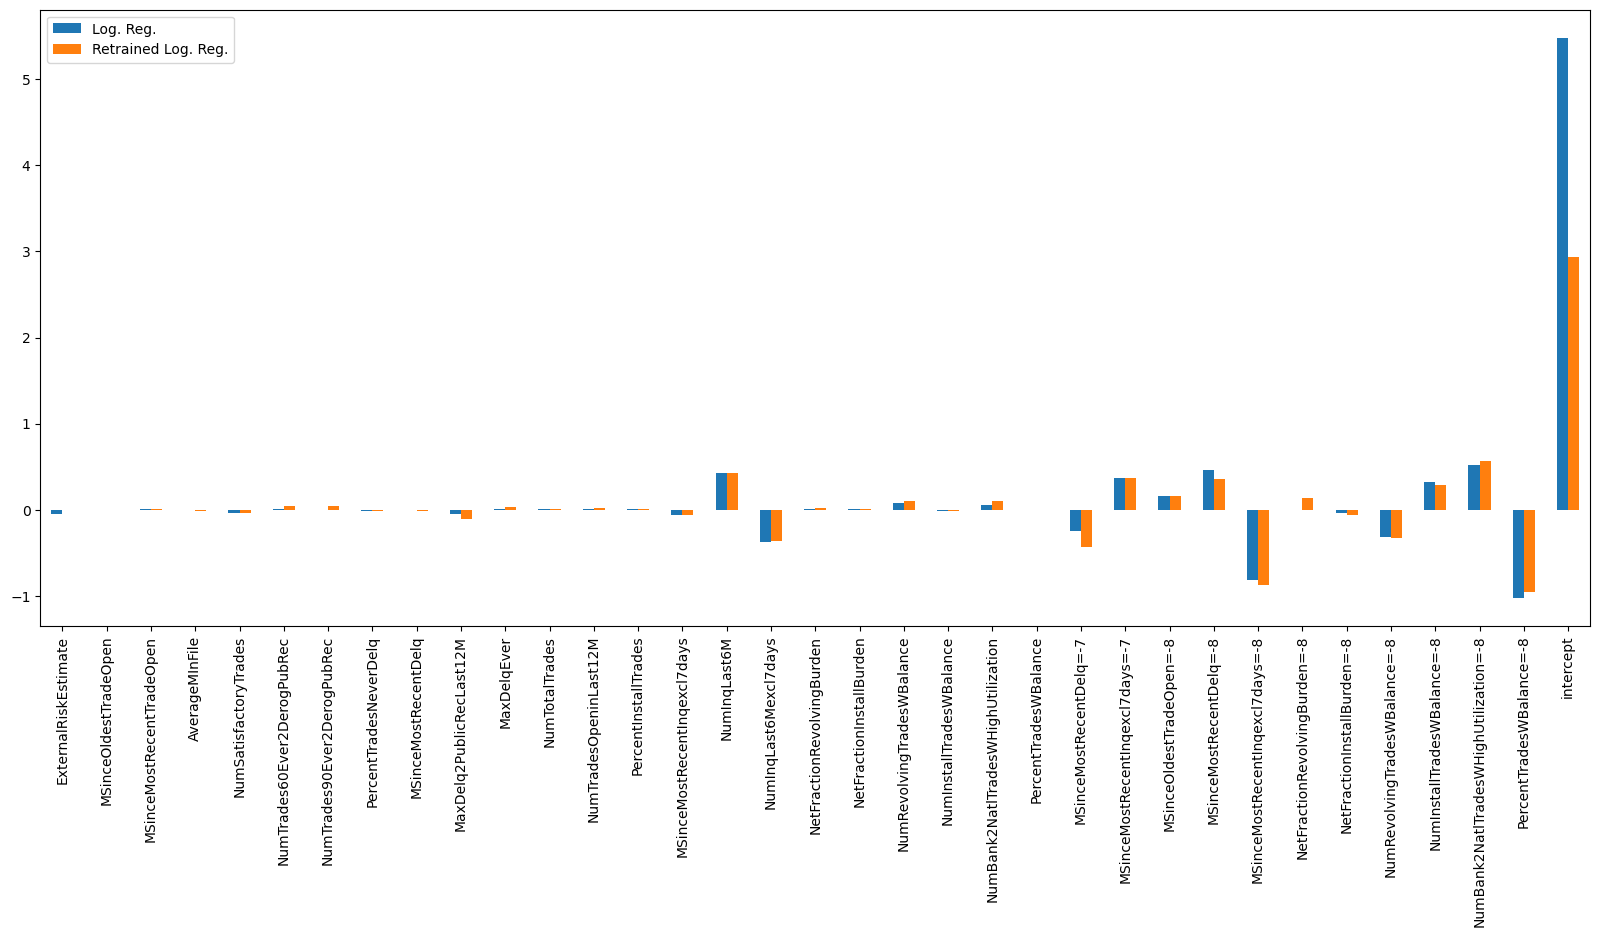

In [197]:
retrained_log_reg.name = "Retrained Log. Reg."
merged_coefficients = pd.merge(
    linear_coefficients[['Log. Reg.']],  # Ensure this is a DataFrame
    retrained_log_reg,
    left_index=True,
    right_index=True
)

merged_coefficients.plot.bar(figsize=(20, 8));

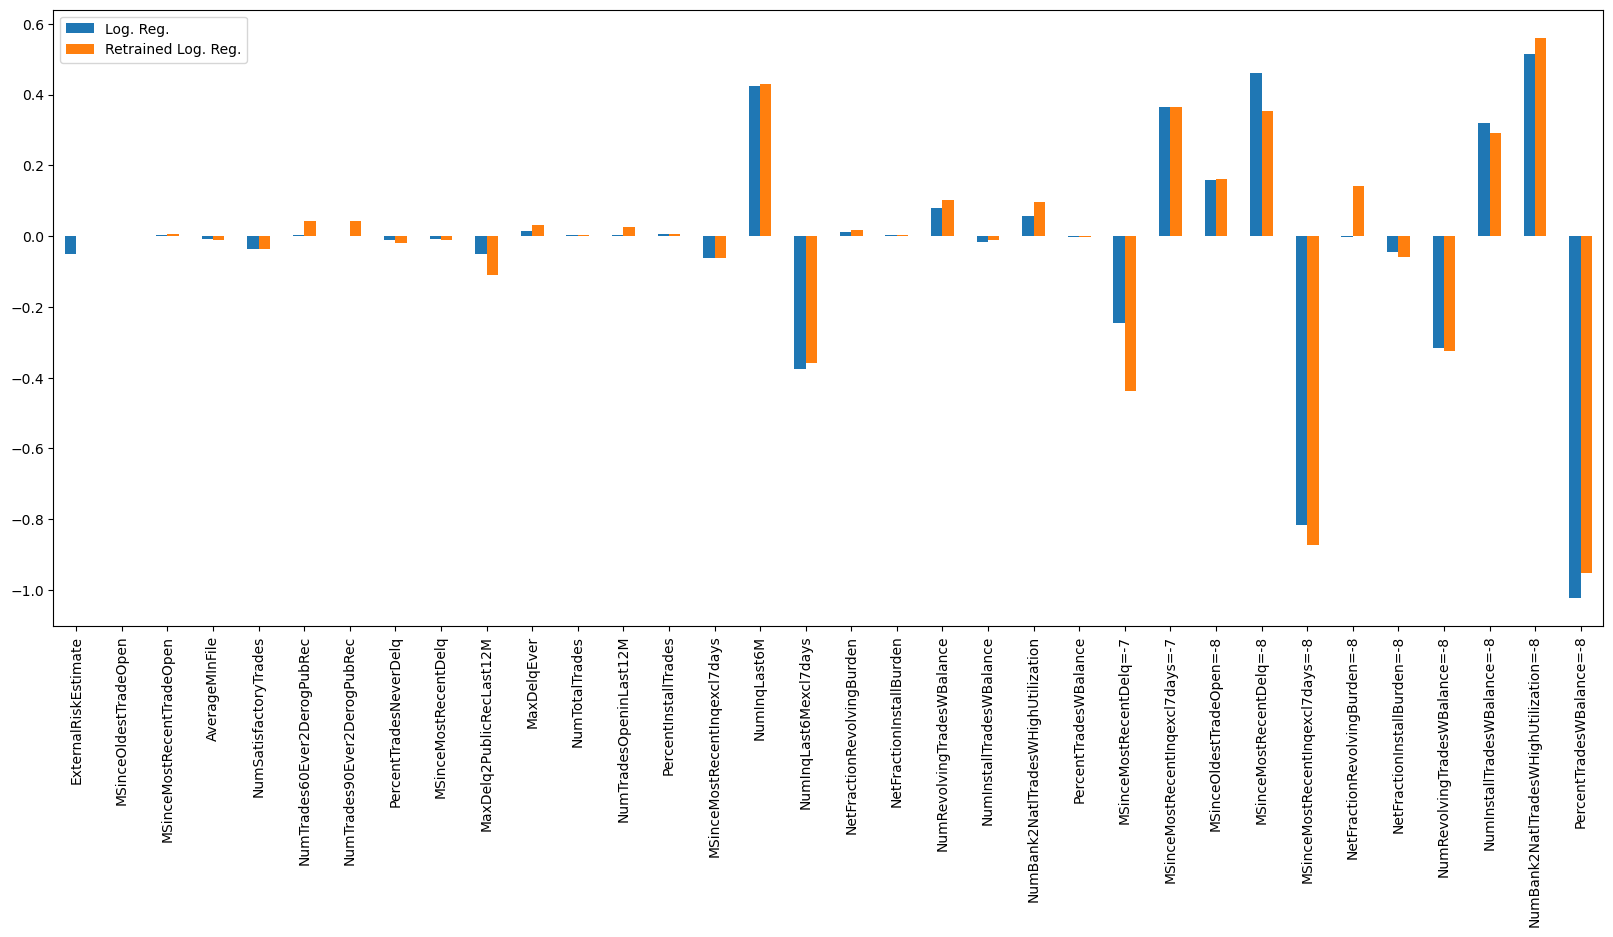

In [198]:
pd.merge(linear_coefficients['Log. Reg.'], retrained_log_reg, left_index=True, right_index=True).iloc[:-1,:].plot.bar(figsize=(20,8));

We trained two logistic regression models:

Original Model → Used all features, including ExternalRiskEstimate.

Retrained Model → Removed ExternalRiskEstimate and retrained.

Even though the two models had different coefficients, their accuracy was almost the same.

- Some features in a dataset correlate (they carry similar information).
- When we removed ExternalRiskEstimate, the model adjusted by redistributing the importance to other features.
- This means there are many ways to make an accurate model, even if the individual pieces (coefficients) change.

#### Estimating probabilities

In [199]:
# make predictions about observations 0 and 1 in the validation set
log_reg.predict(X_train_t_val.iloc[[0,1],:]) 

array([1, 0])

In [200]:
#  compute probabilities corresponding to observation 0 and 1 in the validation set
print(log_reg.predict_proba(X_train_t_val.iloc[[0,1],:]))

[[0.17641261 0.82358739]
 [0.60295103 0.39704897]]


Create the dataframe df_probs which holds the following information about the validation set X_train_t_val:

Prob(0) - the probability that the model log_reg estimates for the label 0

Prob(1) - the probability that the model log_reg estimates for the label 1

Prediction - the prediction

Label - the true label

Correct prediction - is the prediction correct

An example of the output is provided below.

Use may the function log_reg.predict_proba to compute probabilities.

In [201]:
# Get predicted probabilities for each class
probs = log_reg.predict_proba(X_train_t_val)

# Create the dataframe with required columns
df_probs = pd.DataFrame({
    "Prob(0)": probs[:, 0],  # Probability of class 0
    "Prob(1)": probs[:, 1],  # Probability of class 1
    "Prediction": log_reg.predict(X_train_t_val),  # Model predictions
    "Label": Y_train_t_val.values,  # True labels
    "Correct prediction": (log_reg.predict(X_train_t_val) == Y_train_t_val).astype(bool)  # Ensure boolean type
})

# Reset index to match expected output
df_probs = df_probs.reset_index(drop=True)

# Display the first few rows
print(df_probs.head())

    Prob(0)   Prob(1)  Prediction  Label  Correct prediction
0  0.176413  0.823587           1      1                True
1  0.602951  0.397049           0      0                True
2  0.413332  0.586668           1      1                True
3  0.875844  0.124156           0      0                True
4  0.768105  0.231895           0      0                True


In [202]:
df_probs.head()

,Prob(0),Prob(1),Prediction,Label,Correct prediction
0,0.176413,0.823587,1,1,True
1,0.602951,0.397049,0,0,True
2,0.413332,0.586668,1,1,True
3,0.875844,0.124156,0,0,True
4,0.768105,0.231895,0,0,True


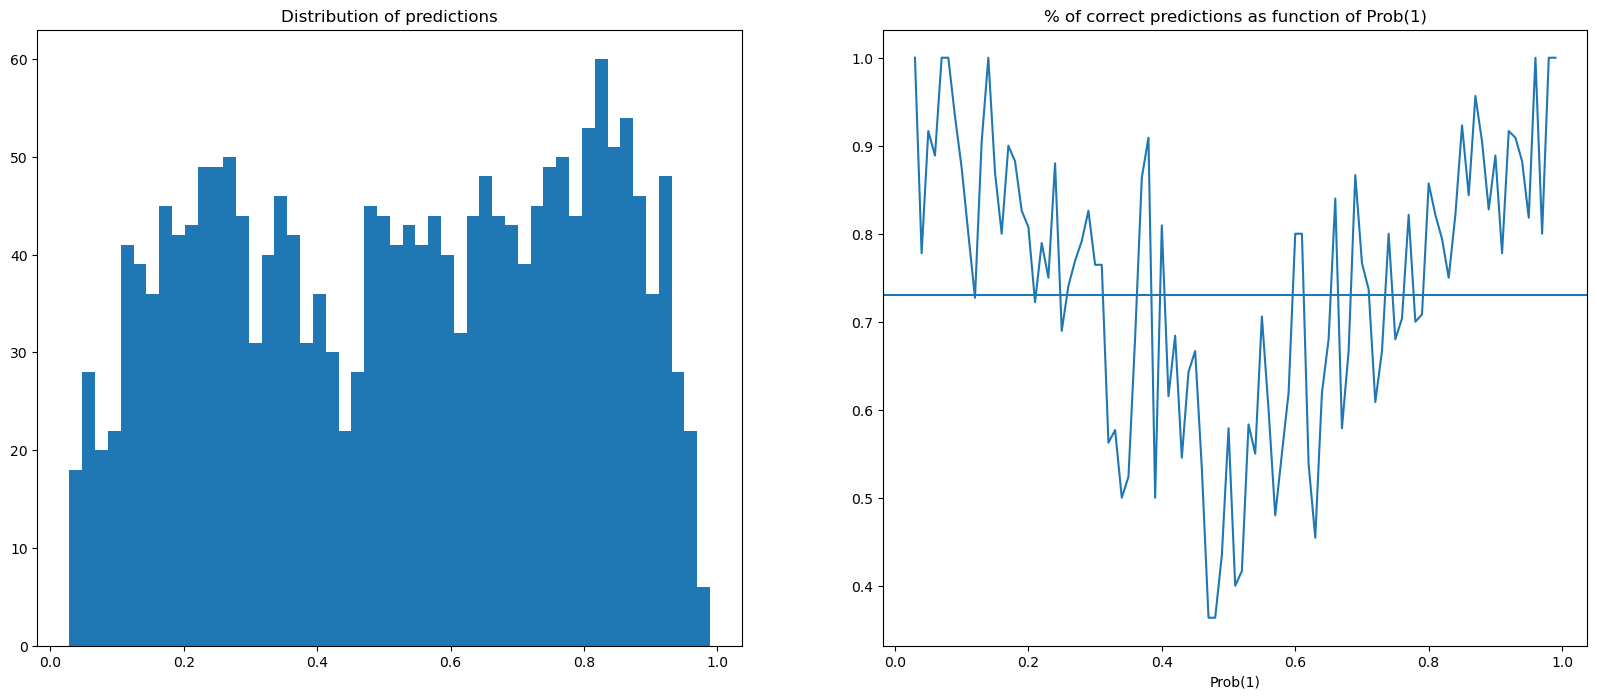

In [203]:
fig,axes = plt.subplots(1,2,figsize=(20,8))
axes[0].hist(df_probs['Prob(1)'], bins=50)
axes[0].set_title('Distribution of predictions')
df_probs.round(2).groupby('Prob(1)').mean()['Correct prediction'].plot(ax=axes[1], title='% of correct predictions as function of Prob(1)');
axes[1].axhline(df_probs['Correct prediction'].mean());

The figure shows that in many cases (when the probability is sufficiently small or large; see the histogram on the left), we are more confident about the model predictions (that's when the percentage of correct predictions is high).

However, there are also many observations for which the probability is close to 0.5. In these cases we are less confident about our predictions (on the right figure we see that prediction accuracy drops when the probability is around 0.5).

Intuitively, this is because observations for which the predicted probability is close to 0.5 are close to the decision boundary, an area where it is typically more difficult to classify.

Part 2: Tree-based models
We now switch to working with tree-based models. Let's train a decision tree.

# Part 2: Tree-based models

In [204]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from IPython.display import Image 
from IPython.display import IFrame

### Decision Trees

In [205]:
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [206]:
# Compute training accuracy
train_accuracy_DT = clf_tree.score(X_train_t_tr, Y_train_t_tr)

# Compute validation accuracy
val_accuracy_DT = clf_tree.score(X_train_t_val, Y_train_t_val)

# Display results
print("Train Accuracy (Decision Tree):", train_accuracy_DT)
print("Validation Accuracy (Decision Tree):", val_accuracy_DT)

Train Accuracy (Decision Tree): 0.7156862745098039
Validation Accuracy (Decision Tree): 0.7068965517241379


In [207]:
print('Train accuracy (DT): %.3f'%train_accuracy_DT)
print('Validation accuracy (DT): %.3f'%val_accuracy_DT)

Train accuracy (DT): 0.716
Validation accuracy (DT): 0.707


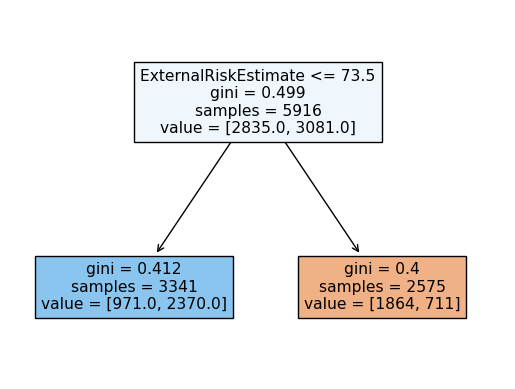

In [208]:
tree.plot_tree(clf_tree, feature_names=column_names, filled=True)
plt.savefig("tree_stump.png", dpi=300)

The model is surprisingly accurate considering the fact that it is a decision stump (decision tree of depth 1), and that the accuracy is close to other models we previously trained on this dataset.

Let's see what happens when we change the depth of the tree. Initialize the variable tree_accuracy to a dataframe whose indexes run from 1 to 12, with two columns, one for Train accuracy and one for Validation accuracy. Use the default parameters of DecisionTreeClassifier except for the depth and setting random_state=0.

In [209]:
# Define the range of depths to test
max_depth_range = range(1, 13)  # Depths from 1 to 12

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Loop over different depths and train decision trees
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0).fit(X_train_t_tr, Y_train_t_tr)
    
    # Compute accuracy on training and validation sets
    train_accuracies.append(clf.score(X_train_t_tr, Y_train_t_tr))
    val_accuracies.append(clf.score(X_train_t_val, Y_train_t_val))

# Create dataframe to store results
tree_accuracy = pd.DataFrame(
    {
        "Train accuracy": train_accuracies,
        "Validation accuracy": val_accuracies
    },
    index=max_depth_range
)


# Print first few rows for sanity check
print(tree_accuracy.head())

   Train accuracy  Validation accuracy
1        0.715686             0.706897
2        0.715686             0.706897
3        0.716362             0.699797
4        0.724814             0.708925
5        0.739351             0.706389


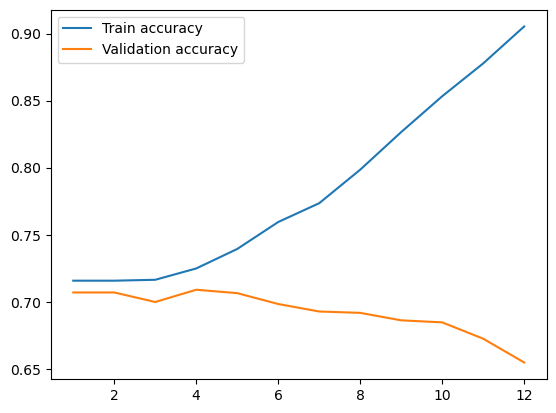

In [210]:
tree_accuracy.plot();

Plotting the train and validation accuracies as a function of the tree depth, we observe that there is no improvement the the validation accuracy (in fact there is a deterioration at some point), while the train accuracy keeps improving. This is an indication of overfitting. This is not surprising with decision trees which can perfectly classify any dataset with sufficient depth (as long as there are no two observations in the dataset with identical features and opposite predictions).

In [211]:
IFrame('https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html', width=950, height=300)


In [212]:
param_grid = [{'max_depth':range(1,13),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,6,20,100,10000]}]

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 13),
                          'max_leaf_nodes': [2, 4, 6, 20, 100, 10000],
                          'min_samples_leaf': [10, 20, 100]}],
             scoring='accuracy')

In [213]:
# Extract results from the grid search
grid_results = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns and rename them for clarity
tree_accuracy_grid = grid_results[
    ["param_max_depth", "param_max_leaf_nodes", "param_min_samples_leaf", "mean_test_score"]
].rename(columns={
    "param_max_depth": "max_depth",
    "param_max_leaf_nodes": "max_leaf_nodes",
    "param_min_samples_leaf": "min_samples_leaf",
    "mean_test_score": "Accuracy"
})

# Reset index for better formatting
tree_accuracy_grid = tree_accuracy_grid.reset_index(drop=True)

In [214]:
tree_accuracy_grid.head()

,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,1,2,10,0.713491
1,1,2,20,0.713491
2,1,2,100,0.713491
3,1,4,10,0.713491
4,1,4,20,0.713491


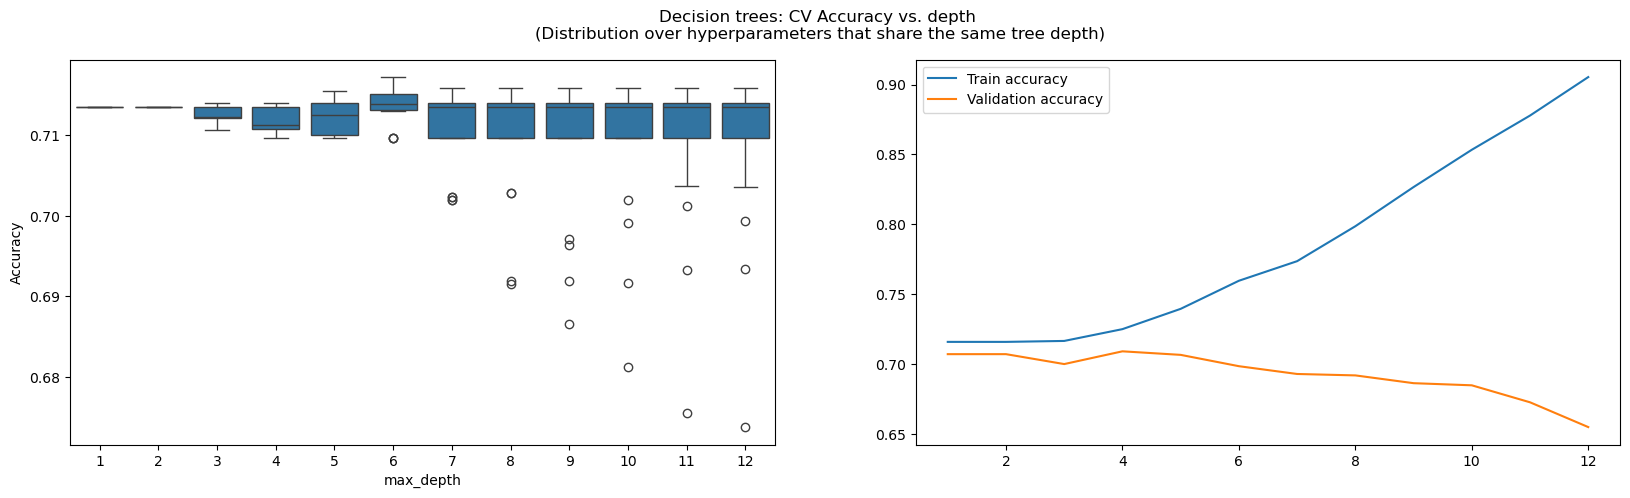

In [215]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('Decision trees: CV Accuracy vs. depth \n(Distribution over hyperparameters that share the same tree depth)')
sns.boxplot(x="max_depth", y='Accuracy', data=tree_accuracy_grid, ax=axes[0]);
tree_accuracy.plot(ax=axes[1]);

#### Training a Simple Decision Tree (Decision Stump)

We trained a DecisionTreeClassifier with max_depth=1, meaning it was a decision stump—a tree with just one decision split.

Results:

Train Accuracy: ~0.716

Validation Accuracy: ~0.707

**🔹 Interpretation: Even though it's a super simple model, it still performed reasonably well, meaning ExternalRiskEstimate is a strong predictor of the outcome.**

#### Increasing Tree Depth

We then trained multiple decision trees with depths ranging from 1 to 12 and recorded their train and validation accuracies.

What Happened?

- Training Accuracy Kept Increasing (because deeper trees can memorize the training data)
- Validation Accuracy Started Decreasing After a Certain Depth (overfitting)

Observation:

When we increase the depth, the tree learns more about the training set, but after a certain depth, it overfits, meaning it starts memorizing noise instead of learning real patterns.

Overfitting happens because deep decision trees become too specific to training data and fail to generalize well to new, unseen data.

#### Visualizing Overfitting

- A model that performs well on training data but poorly on validation data is overfitting.
- A tree that’s too deep learns noise instead of useful patterns.

#### Hyperparameter Tuning with Grid Search
We ran GridSearchCV, which systematically tested different combinations of:

- max_depth: How deep the tree can grow.
- min_samples_leaf: Minimum number of samples required at a leaf node.
- max_leaf_nodes: Limits the number of leaf nodes.

Why?

To find the best combination that balances performance and prevents overfitting.

This ensures the tree is neither too simple (underfitting) nor too complex (overfitting).

#### Final Takeaways
✅ Deeper trees = Higher train accuracy but lower validation accuracy (Overfitting) ✅ Grid search helps find a balance between complexity and generalization ✅ A simpler model might be preferable if it achieves similar accuracy ✅ A decision stump (max_depth=1) was surprisingly effective in this case

Why Does This Matter?

In real-world applications, we don't just want high training accuracy; we want a model that generalizes well to unseen data.
This experiment demonstrated how choosing the right complexity for a model is critical.
Blindly increasing model complexity leads to overfitting, which results in poor performance on new data.


## Ensemble methods - Random forests

In [216]:
rf = RandomForestClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [217]:
# Compute training and validation accuracies
train_accuracy_RF = rf.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_RF = rf.score(X_train_t_val, Y_train_t_val)

# Display results
print("Train Accuracy (Random Forest):", train_accuracy_RF)
print("Validation Accuracy (Random Forest):", val_accuracy_RF)

Train Accuracy (Random Forest): 0.723630831643002
Validation Accuracy (Random Forest): 0.7155172413793104


Why are we doing this?

We want to compare the Random Forest model with previous models (e.g., Decision Tree).

We are starting simple (decision stumps) to see if even a basic ensemble can improve accuracy.

What happens?

The train accuracy is 0.724.

The validation accuracy is 0.716.

This is a small improvement over a single decision tree, suggesting that even a simple ensemble can be more robust.


In [218]:
print('Train accuracy (RF): %.3f'%train_accuracy_RF)
print('Validation accuracy (RF): %.3f'%val_accuracy_RF)

Train accuracy (RF): 0.724
Validation accuracy (RF): 0.716


We gain a roughly 1% improvement comparing to the decision stump. Let's try to improve the model by performing hyper-parameter tuning. Read the documentation to see what each of the hyperparameters specified above does (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Note: expect the running time to be longer here. We train 3x2x3x4 RF models, each consisting of 10-50 decision trees.

In [219]:
param_grid = [{'n_estimators':[10,20,50],
               'max_depth':range(1,8),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,8,16]}]

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 8),
                          'max_leaf_nodes': [2, 4, 8, 16],
                          'min_samples_leaf': [10, 20, 100],
                          'n_estimators': [10, 20, 50]}],
             scoring='accuracy')

A Random Forest's performance depends on hyperparameters like the number of trees, depth, and leaf sizes.
Grid Search helps find the best combination of these parameters.
We use cross-validation (CV) to ensure the model is tested across different data splits.

In [220]:
grid_results_rf = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns and rename them for clarity
rf_accuracy_grid = grid_results_rf[
    ["param_n_estimators", "param_max_depth", "param_max_leaf_nodes", "param_min_samples_leaf", "mean_test_score"]
].rename(columns={
    "param_n_estimators": "n_estimators",
    "param_max_depth": "max_depth",
    "param_max_leaf_nodes": "max_leaf_nodes",
    "param_min_samples_leaf": "min_samples_leaf",
    "mean_test_score": "Accuracy"
})

# Reset index for better formatting
rf_accuracy_grid = rf_accuracy_grid.reset_index(drop=True)

# Display first few rows
print(rf_accuracy_grid.head())

  n_estimators max_depth max_leaf_nodes min_samples_leaf  Accuracy
0           10         1              2               10  0.703012
1           20         1              2               10  0.720592
2           50         1              2               10  0.718733
3           10         1              2               20  0.703012
4           20         1              2               20  0.720592


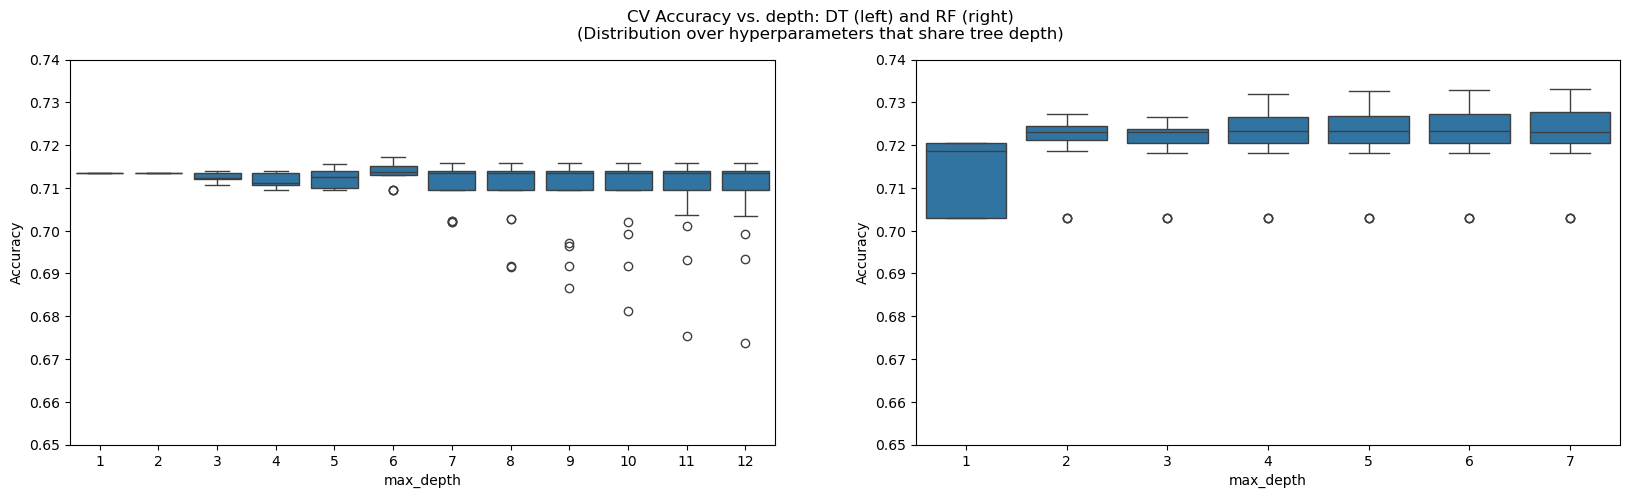

In [221]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('CV Accuracy vs. depth: DT (left) and RF (right)\n(Distribution over hyperparameters that share tree depth)')
sns.boxplot(x="max_depth", y='Accuracy', data=tree_accuracy_grid, ax=axes[0]);
sns.boxplot(x="max_depth", y='Accuracy', data=rf_accuracy_grid, ax=axes[1]);
axes[0].set_ylim(0.65,0.74);axes[1].set_ylim(0.65,0.74);

In [222]:
# a model trained using the best configuration on all folds
best_RF_model = grid_search.best_estimator_
best_RF_model

RandomForestClassifier(max_depth=7, max_leaf_nodes=16, min_samples_leaf=100,
                       n_estimators=10, random_state=0)

Now, we train the best performing Random Forest model from Grid Search.

In [223]:
# Compute training accuracy for the optimized RF model
train_accuracy_RF_opt = best_RF_model.score(X_train_t_tr, Y_train_t_tr)

# Compute validation accuracy for the optimized RF model
val_accuracy_RF_opt = best_RF_model.score(X_train_t_val, Y_train_t_val)

# Display results
print("Train Accuracy (Optimized Random Forest):", train_accuracy_RF_opt)
print("Validation Accuracy (Optimized Random Forest):", val_accuracy_RF_opt)

Train Accuracy (Optimized Random Forest): 0.7408722109533469
Validation Accuracy (Optimized Random Forest): 0.7200811359026369


In [224]:
print('Train accuracy (RF optimized): %.3f'%train_accuracy_RF_opt)
print('Validation accuracy (RF optimized): %.3f'%val_accuracy_RF_opt)

Train accuracy (RF optimized): 0.741
Validation accuracy (RF optimized): 0.720


One downside of Random Forests is that they are harder to interpret than a single decision tree. We compute feature importance to understand which features matter most.

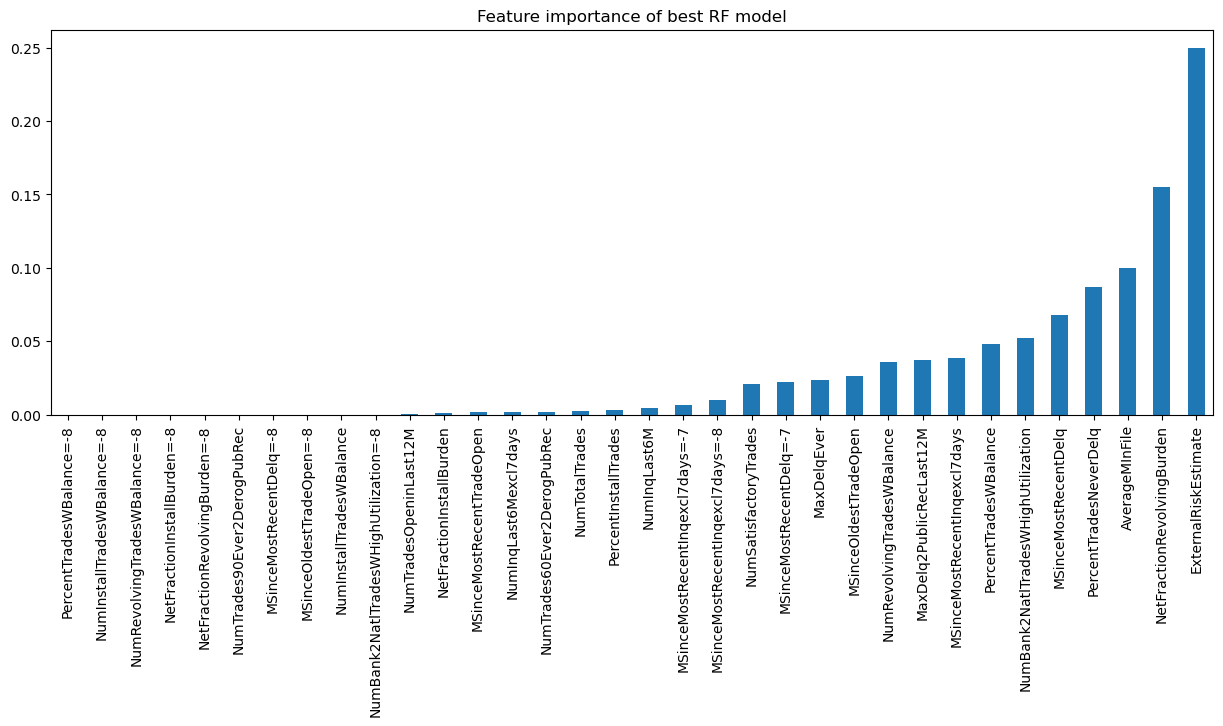

In [225]:
# plot feature importance
pd.Series(data=grid_search.best_estimator_.feature_importances_, 
          index=column_names).sort_values().plot.bar(figsize=(15,5), 
                                                     title='Feature importance of best RF model');

We need to explain which features the model relies on.

Unlike a single decision tree, a Random Forest uses multiple trees, making it harder to visualize.

What happens?

The most important features are highlighted.
ExternalRiskEstimate is still a dominant feature, but others also contribute.

**Testing the Effect of Increasing the Number of Trees**

In [226]:
# Define the range of n_estimators to test
n_estimators_range = range(10, 200, 10)  # From 10 to 190 with step of 10

# Initialize lists to store accuracy values
train_accuracies_rf = []
val_accuracies_rf = []

# Loop over different numbers of trees and train RF classifiers
for n in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=0, max_depth=1).fit(X_train_t_tr, Y_train_t_tr)
    
    # Compute accuracy on training and validation sets
    train_accuracies_rf.append(rf_model.score(X_train_t_tr, Y_train_t_tr))
    val_accuracies_rf.append(rf_model.score(X_train_t_val, Y_train_t_val))

# Create dataframe to store results
rf_accuracy = pd.DataFrame(
    {
        "Train accuracy": train_accuracies_rf,
        "Validation accuracy": val_accuracies_rf
    },
    index=n_estimators_range
)

# Display first few rows for sanity check
print(rf_accuracy.head())

    Train accuracy  Validation accuracy
10        0.704868             0.694726
20        0.720926             0.712982
30        0.720926             0.710446
40        0.720419             0.709432
50        0.719912             0.708418


Initially, both train and validation accuracy improve.
After some point, validation accuracy stops improving, meaning more trees don’t help much.
This tells us that having too many trees can be wasteful in terms of computation.

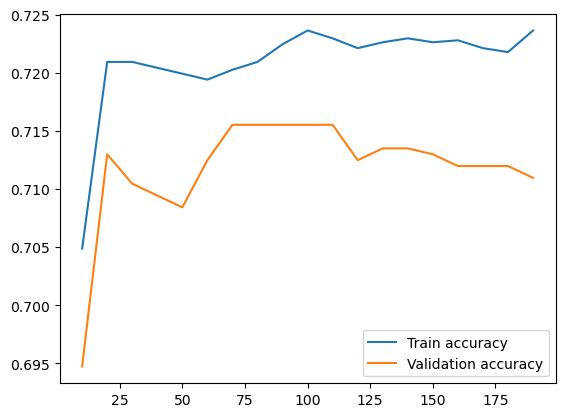

In [227]:
rf_accuracy.plot();

## Ensemble methods - Boosting

In [228]:
clf_boosting = AdaBoostClassifier(random_state=0).fit(X_train_t_tr, Y_train_t_tr)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [229]:
# Train an AdaBoost classifier
clf_boosting = AdaBoostClassifier(random_state=0).fit(X_train_t_tr, Y_train_t_tr)

# Compute training accuracy
train_accuracy_boosting = clf_boosting.score(X_train_t_tr, Y_train_t_tr)

# Compute validation accuracy
val_accuracy_boosting = clf_boosting.score(X_train_t_val, Y_train_t_val)

# Display results
print("Train Accuracy (Boosting):", train_accuracy_boosting)
print("Validation Accuracy (Boosting):", val_accuracy_boosting)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Accuracy (Boosting): 0.7489858012170385
Validation Accuracy (Boosting): 0.7276876267748479


Boosting outperformed the previous models.
Even though we used default parameters, it gave better accuracy than Random Forest (RF) and Decision Trees (DT).
Boosting is powerful because it focuses on "hard-to-classify" examples.

In [230]:
print('Train accuracy (boosting): %.3f'%train_accuracy_boosting)
print('Validation accuracy (boosting): %.3f'%val_accuracy_boosting)
print('\nTrain accuracy (RF optimized): %.3f'%train_accuracy_RF_opt)
print('Validation accuracy (RF optimized): %.3f'%val_accuracy_RF_opt)
print('\nTrain accuracy (DT): %.3f'%train_accuracy_DT)
print('Validation accuracy (DT): %.3f'%val_accuracy_DT)

Train accuracy (boosting): 0.749
Validation accuracy (boosting): 0.728

Train accuracy (RF optimized): 0.741
Validation accuracy (RF optimized): 0.720

Train accuracy (DT): 0.716
Validation accuracy (DT): 0.707


Using the default hyperparameters, we created an ensemble model that outperforms the previous models. This will not always be the case, and one should not conclude that Boosting is always superior to Random Forests.

There are several important hyperparameters for tuning the Boosting algorithm. One is the base_estimator which refers to the base model that we repeatedly train on (slight variations of) the data. The other two are n_estimators and learning_rate which go together. The first controlling the size of the ensemble (e.g., number of trees), and the second is the "step size", intuitively indicating the importance we give to each model. The smaller the learning rate, the more iterations we may need to reach the optimal ensemble.

Let's illustrate the effect of using a small learning rate.

Initialize the variable boosting_accuracy_learning_rate_0_01 to a dataframe whose indexes run from 10 to 190 with increments of 10, with two columns, one for Train accuracy and one for Validation accuracy. Create an AdaBoost classifier as follows: AdaBoostClassifier(n_estimators=?, random_state=0, learning_rate=0.01) where ? should be replaced by the ensemble size.

In [231]:
# Define the range of n_estimators to test
n_estimators_range = range(10, 200, 10)  # From 10 to 190 with step of 10

# Initialize lists to store accuracy values
train_accuracies_boosting = []
val_accuracies_boosting = []

# Loop over different numbers of estimators and train Boosting classifiers
for n in n_estimators_range:
    boosting_model = AdaBoostClassifier(n_estimators=n, random_state=0, learning_rate=0.01).fit(X_train_t_tr, Y_train_t_tr)
    
    # Compute accuracy on training and validation sets
    train_accuracies_boosting.append(boosting_model.score(X_train_t_tr, Y_train_t_tr))
    val_accuracies_boosting.append(boosting_model.score(X_train_t_val, Y_train_t_val))

# Create dataframe to store results
boosting_accuracy_learning_rate_0_01 = pd.DataFrame(
    {
        "Train accuracy": train_accuracies_boosting,
        "Validation accuracy": val_accuracies_boosting
    },
    index=n_estimators_range
)

# Display first few rows for sanity check
print(boosting_accuracy_learning_rate_0_01.head())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

    Train accuracy  Validation accuracy
10        0.715686             0.706897
20        0.715686             0.706897
30        0.715686             0.706897
40        0.715686             0.706897
50        0.715686             0.706897


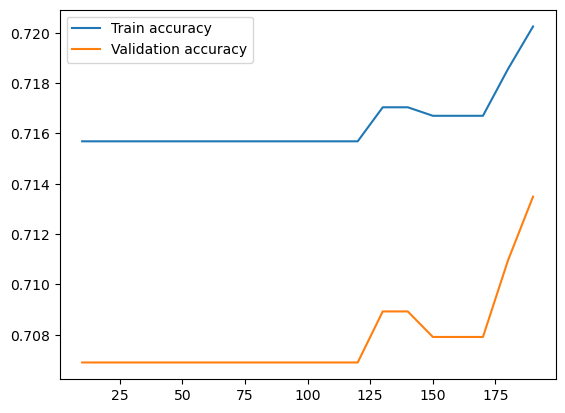

In [232]:
boosting_accuracy_learning_rate_0_01.plot();


Even though we trained an ensemble with 190 trees, the learning rate is small (0.01) and therefore we will need much larger ensembles to obtain better models (assuming we keep the same learning rate).

Let's try a higher learning rate and train a larger ensemble. Initialize the variable boosting_accuracy_learning_rate_1 to a dataframe whose indexes run from 10 to 390 with increments of 10, with two columns, one for Train accuracy and one for Validation accuracy. Create an AdaBoost classifier as follows: AdaBoostClassifier(n_estimators=?, random_state=0, learning_rate=1) where ? should be replaced by the ensemble size.

With a higher learning rate, the model reached peak validation accuracy with around 60 trees.
Beyond 60 trees, the model started to overfit (train accuracy kept improving, but validation accuracy got worse).
This confirms that a high learning rate can lead to overfitting if the model becomes too complex.

In [233]:
# Define the range of n_estimators to test
n_estimators_range = range(10, 400, 10)  # From 10 to 390 with step of 10

# Initialize lists to store accuracy values
train_accuracies_boosting = []
val_accuracies_boosting = []

# Loop over different numbers of estimators and train Boosting classifiers
for n in n_estimators_range:
    boosting_model = AdaBoostClassifier(n_estimators=n, random_state=0, learning_rate=1).fit(X_train_t_tr, Y_train_t_tr)
    
    # Compute accuracy on training and validation sets
    train_accuracies_boosting.append(boosting_model.score(X_train_t_tr, Y_train_t_tr))
    val_accuracies_boosting.append(boosting_model.score(X_train_t_val, Y_train_t_val))

# Create dataframe to store results
boosting_accuracy_learning_rate_1 = pd.DataFrame(
    {
        "Train accuracy": train_accuracies_boosting,
        "Validation accuracy": val_accuracies_boosting
    },
    index=n_estimators_range
)

# Display first few rows for sanity check
print(boosting_accuracy_learning_rate_1.head())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

    Train accuracy  Validation accuracy
10        0.732082             0.716024
20        0.740196             0.720588
30        0.744591             0.722110
40        0.746619             0.722617
50        0.748986             0.727688


We tested how the learning rate affects Boosting performance. We ran two different experiments:

Using a small learning rate (0.01): We trained the model with different numbers of estimators (from 10 to 190).

Using a larger learning rate (1): We trained with more trees (from 10 to 390).

Why we did it

- The learning rate controls how much each weak learner (tree) contributes to the final model.
- A small learning rate requires more trees to reach optimal performance.
- A large learning rate may cause overfitting if the model becomes too complex.

In [234]:
boosting_accuracy_learning_rate_1.head()

,Train accuracy,Validation accuracy
10,0.732082,0.716024
20,0.740196,0.720588
30,0.744591,0.722110
40,0.746619,0.722617
50,0.748986,0.727688


Training and validation accuracy did not improve significantly.
Even with 190 trees, the accuracy remained around 71.6%.
With a very small learning rate, the model learns too slowly and doesn't reach optimal performance.

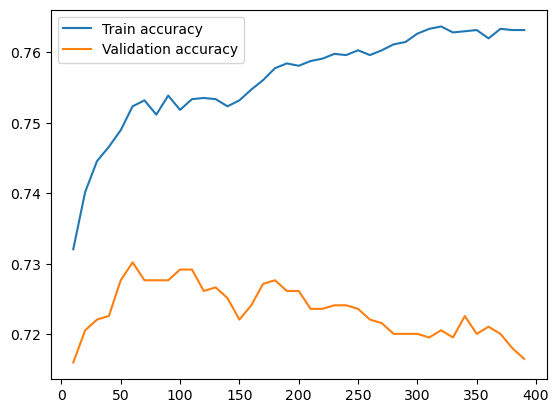

In [235]:
boosting_accuracy_learning_rate_1.plot();

**Boosting is very effective**

It outperformed Decision Trees and Random Forests. Works well even with default parameters.

**Learning rate is crucial**

- Small learning rate → Needs more trees, learns very slowly.
- Large learning rate → Reaches peak accuracy faster but risks overfitting.

**Overfitting happens when adding too many trees**
- After 60 estimators, validation accuracy started declining.
- This means the model was memorizing training data instead of generalizing.